# Week 1: Exploratory Data Analysis and Feature Engineering

**Student Name 1, Student Name 2**

## Aims

By the end of this notebook you will 

* understand and play with the different aspects of data pre-processing
* be familiar with tools for exploratory data analysis and visualization
* understand the basics of feature engineering
* build your first pipeline

## Topics and Instructions

1. [Problem Definition and Setup](#setup)

2. [Exploratory Data Analysis](#eda)

3. [Data Preprocessing](#prep)

4. [Feature Engineering](#engin)

5. [Summary](#sum)

In lecture this week, we reviewed the general **machine learning pipline**, which following the ["Machine Learning Project Checklist"](https://github.com/ageron/handson-ml/blob/master/ml-project-checklist.md) of Geron (2019) can be stuctured as:

>- Frame the problem and look at the big picture.
>- Get the data.
>- Explore the data and gain insights.
>- Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
>- Explore many different models and shortlist the best ones.
>- Fine-tune your models and combine them into a great solution.
>- Present your solution.
>- Launch, monitor, and mantain your system.

In this week's workshop, we will focus on the initial steps of this pipeline, that is on, data pre-processing, exploratory data analysis and feature engineering.

During workshops, you will complete the worksheets together in teams of 2-3, using **pair programming**. During the first few weeks, the worksheets will contain cues to switch roles between driver and navigator. When completing worksheets:

>- You will have tasks tagged by (CORE) and (EXTRA). 
>- Your primary aim is to complete the (CORE) components during the WS session, afterwards you can try to complete the (EXTRA) tasks for your self-learning process. 
>- Look for the 🏁 as cue to switch roles between driver and navigator.
>- In some Exercises, you will see some beneficial hints at the bottom of questions.

Instructions for submitting your workshops can be found at the end of worksheet. As a reminder, you must submit a pdf of your notebook on Learn by 16:00 PM on the Friday of the week the workshop was given. 

# Problem Definition and Setup <a id='setup'></a>

## Packages

Now lets load in some packages to get us started. The following are widely used libraries to start working with Python in general.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

If you need to install any packages from scratch, you need to install the related library before calling it. For instance, [feature-engine](https://feature-engine.trainindata.com/en/latest/) is a Python library for Feature Engineering and Selection, which: 

- contains multiple transformers to engineer and select features to use in machine learning models.

- preserves scikit-learn functionality with methods fit() and transform() to learn parameters from and then transform the data (we will learn more about these throughout the course!).

In [50]:
# To install the feature-engine library (if not already installed)
# !pip install feature-engine

In some cases, we may need only a component of the whole library. If this is the case, it is possible to import specific things from a module (library), using the following line of code:

In [28]:
from feature_engine.imputation import EndTailImputer

## Problem

Now, it is time move on to the next step.

> You are asked to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.
>
> **Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.**
>
> The first question to ask your boss is what exactly is the business objective; building a model is probably not the end goal. **How does the company expect to use and benefit from this model?** This is important because it will determine how you frame the problem, what algorithms you will select, what performance measure you will use to evaluate your model, and how much effort you should spend tweaking it.
>
> The next question to ask is **what the current solution looks like (if any)**. It will often give you a reference performance, as well as insights on how to solve the problem. Your boss answers that the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules.
>
> This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 20%. This is why the company thinks that it would be useful to train a model to predict a district’s median housing price given other data about that district. The census data looks like a great dataset to exploit for this purpose, since it includes the median housing prices of thousands of districts, as well as other data.

---

### 🚩 Exercise 1 (CORE)

Using the information above answer the following questions about how you may design your machine learning system.

a) Is this a supervised or unsupervised learning task? 

>- This is a typical supervised learning task since you are given labeled data, i.e. each observation (district) contains inputs (population, income, etc.) and an output (median housing price).

b) Is this a classification, regression, or some other task?

>- This is a typical regression task, since you are asked to predict a numerical value. More specifically, this is a multiple regression problem since the model will use multiple features to make a prediction (it will use the district's population, the median income, etc.). It is also a univariate regression problem since we are only trying to predict a single numerical value for each district. If we were trying to predict multiple numerical values per district, it would be a multivariate regression problem.

c) Suppose you are only required to predict if a district's median housing prices are "cheap," "medium," or "expensive". Will this be the same or a different task?

>- This will be a different task than the previous problem. In this case, getting the price perfectly right is not important at all; your model just needs to get the category right. If that’s so, then the problem should be framed as a classification task, not a regression task. 

## Data Download

The data we will be using this week is a modified version of the California Housing dataset. We can get the data a number of ways. The easiest is just to load it from the working directory that we are working on (where we have already downloaded it to).

In [29]:
housing = pd.read_csv("housing.csv")
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# Exploratory Data Analysis <a id='eda'></a>

In this section we are going to start with exploring the California Housing data using methods that you will likely already be familiar with.

Data can come in a broad range of forms encompassing a collection of discrete objects, numbers, words, events, facts, measurements, observations, or even descriptions of things. Processing data using exploratory data analysis (EDA) can elicit useful information and knowledge by examining the available dataset to discover patterns, spot anomalies, test hypotheses, and check assumptions. 

Let's start by examining the [Data Dictionary](https://www.kaggle.com/camnugent/california-housing-prices) and the variables available:

> `longitude`: A measure of how far west a house is; a higher value is farther west
>
> `latitude`: A measure of how far north a house is; a higher value is farther north
>
> `housingMedianAge`: Median age of a house within a block; a lower number is a newer building
>
> `totalRooms`: Total number of rooms within a block
>
> `totalBedrooms`: Total number of bedrooms within a block
>
> `population`: Total number of people residing within a block
>
> `households`: Total number of households, a group of people residing within a home unit, for a block
>
> `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
>
> `medianHouseValue`: Median house value for households within a block (measured in US Dollars)
>
> `oceanProximity`: Location of the house w.r.t ocean/sea

### 🚩 Exercise 2 (CORE)

a) Examine the datatypes for each column calling [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html). What is the total number of observations and total number of variables? What is the type of each variable?

In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The data has `20640` observations (number of rows) and `10` variables (number of columns). Most of the columns are in `float64` format, except the ocean proximity variable, which is an `object`.

b) From the information provided above, can you anticipate any data cleaning we may need to do?

>- There are 20640 instances in the dataset but `total_bedrooms` only has 20433 non-null values. This means that 207 districts are missing this feature. As most machine learning models cannot handle missing data, we will need to take care of this later.
>- Furthermore, `ocean_proximity` has the `Dtype` of `object`. This could hold all sorts of different Python object types, but in this case we know it is a text attribute. This will require some preparation for our models to be able to handle this categorical attribute.

### 🚩 Exercise 3  (CORE)

a) Use descriptive statistics and histograms to examine the distributions of the numerical attributes.
<br><br>
<details><summary><b><u>Hint</b></u></summary>
    
- <code>.describe()</code> can be used to create summary descriptive statistics on a pandas dataframe.
- You can use a [<code>sns.histplot</code>](https://seaborn.pydata.org/generated/seaborn.histplot.html) to create histograms
    
</details>

In [31]:
housing.describe().round(2)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count   20640.00  20640.00            20640.00     20640.00        20433.00   
mean     -119.57     35.63               28.64      2635.76          537.87   
std         2.00      2.14               12.59      2181.62          421.39   
min      -124.35     32.54                1.00         2.00            1.00   
25%      -121.80     33.93               18.00      1447.75          296.00   
50%      -118.49     34.26               29.00      2127.00          435.00   
75%      -118.01     37.71               37.00      3148.00          647.00   
max      -114.31     41.95               52.00     39320.00         6445.00   

       population  households  median_income  median_house_value  
count    20640.00    20640.00       20640.00            20640.00  
mean      1425.48      499.54           3.87           206855.82  
std       1132.46      382.33           1.90           115395.62  
min          3.00        1.00           0.50            14999.00  
25%        787.00      280.00           2.56           119600.00  
50%       1166.00      409.00           3.53           179700.00  
75%       1725.00      605.00           4.74           264725.00  
max      35682.00     6082.00          15.00           500001.00

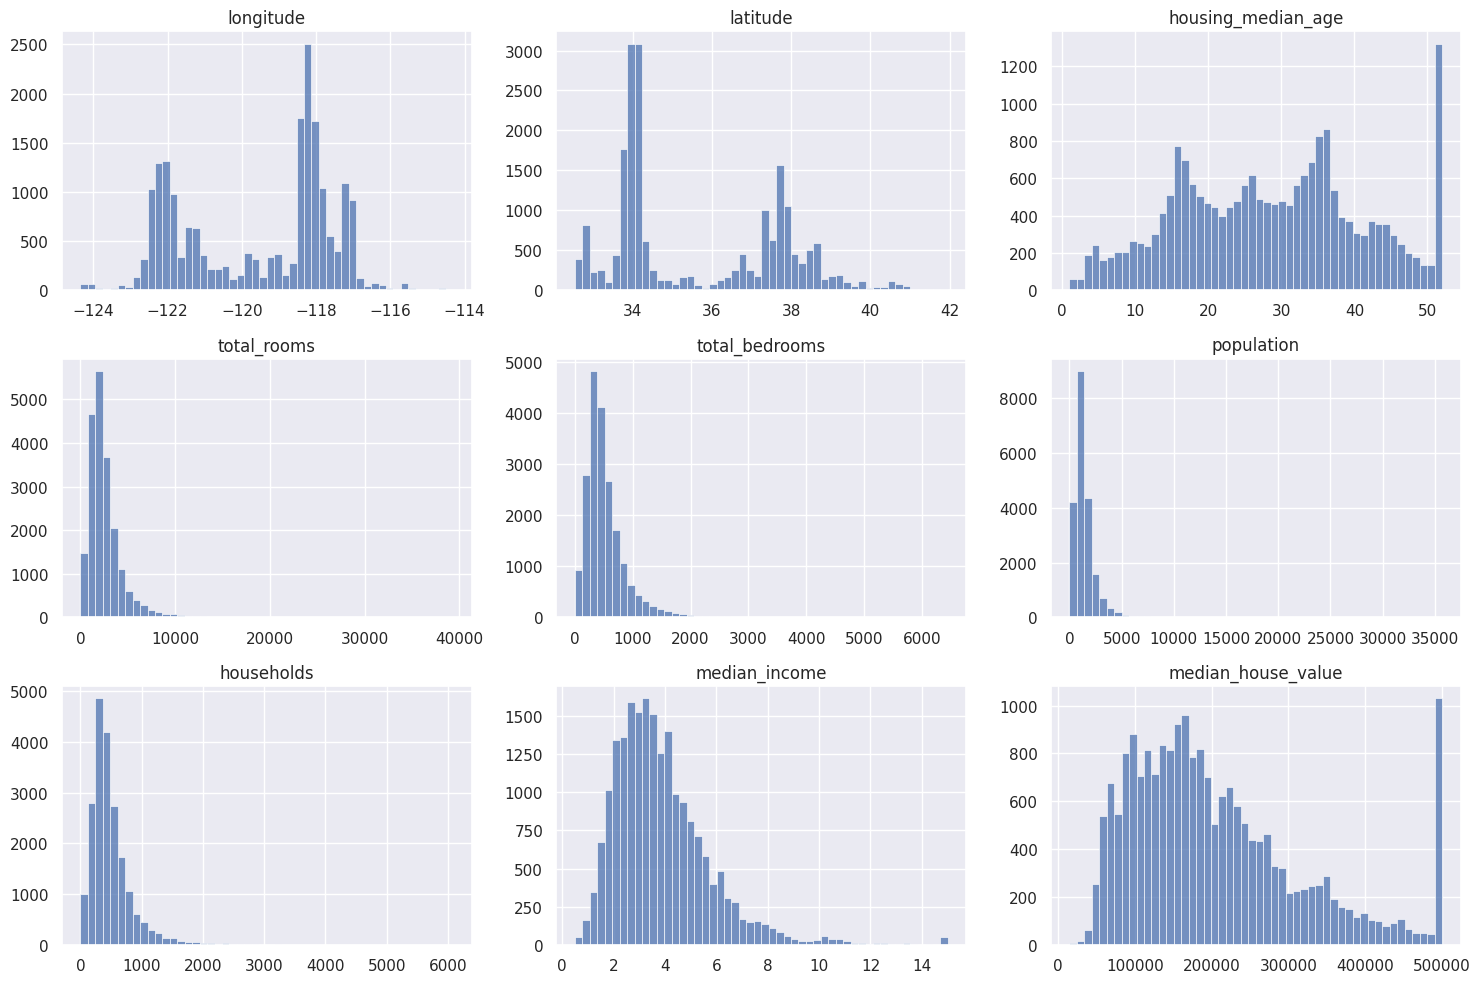

In [32]:
fig, axes = plt.subplots(figsize=(15,10), ncols=3, nrows=3)
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.histplot(data = housing.iloc[:, i], bins=50, ax=ax)
    ax.set_title(housing.iloc[:,i].name)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.tight_layout()
plt.show()

b) Can you identify other pre-processing/feature engineering steps we may need to do? Which variables represent counts and how are they distributed?

>- From the descriptive statistics and histograms, we can see that the features all have very different scales.
>- Many of the histograms are heavy-tailed: they extend much farther to the right of the median than to the left. This may make it a bit harder for some algorithms to detect patterns, and we may want to try transforming these attributes later on. 
>- The variables `total_rooms`, `total_bedrooms`, `population`, `households` are all counts and, like most count data,  are right skewed.

c) One thing you may have noticed from the histogram is that the median income, housing median age, and the median house value are capped. The median house value capping (this being our target value) may or may not be a problem depending on your client. If we needed precise predictions beyond $\$500,000$, we may need to either collect proper labels/outputs for the districts whose labels were capped or remove these districts from the data. Following the latter, remove all districts whose median house value is capped. How many observations are there now?

In [33]:
# Remove the cases where median_house_value >= 500,000$
housing = housing[housing["median_house_value"] < 500000]
housing.shape[0]

19648


### 🚩 Exercise 4 (CORE)

What are the possible categories for the `ocean_proximity` variable? Are the number of instances in each category similar? 
<br><br>
<details><summary><b><u>Hint</b></u></summary>
    
- [<code>value_counts()</code>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) can be used to count the values of the categories a pandas series.
- You can use a [<code>sns.countplot</code>](https://seaborn.pydata.org/generated/seaborn.countplot.html) to create barplot with the number of instances of each category 
    
</details>

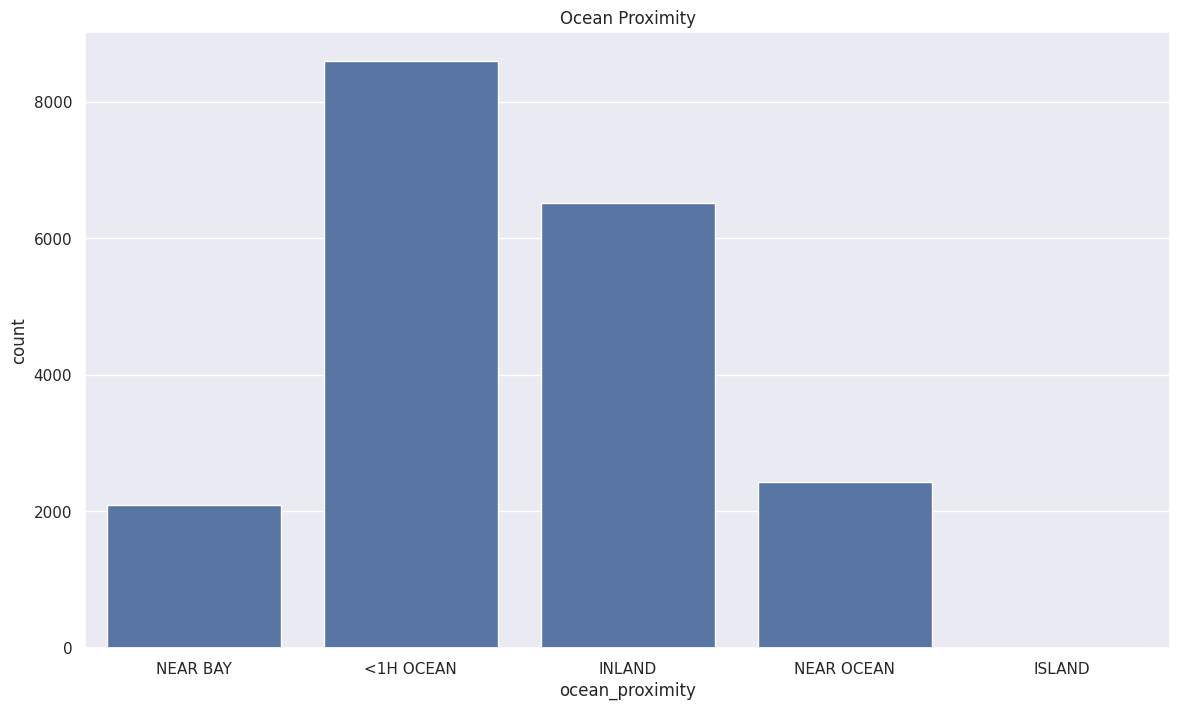

In [34]:
# sns.set(rc={'figure.figsize': (14, 8)}) 
sns.countplot(x = housing["ocean_proximity"])
plt.title("Ocean Proximity")
plt.show()

In [35]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     8595
INLAND        6523
NEAR OCEAN    2437
NEAR BAY      2088
ISLAND           5
Name: count, dtype: int64

>- We have 5 possible categories. As shown above most districts are either `<1H OCEAN` or `INLAND`, with some near the ocean or bay and only 5 `ISLAND` observations. As there are so few `ISLAND` observations this category may not be that useful.

🏁 **Now, is a good point to switch driver and navigator**

### 🚩 Exercise 5 (CORE)

Examine if/which of the features are correlated to each other. Are any of the features correlated with our output (`median_house_value`) variable?

- Can you think of any reason why certain features may be correlated?

- How might we use this information in later steps of our model pipeline?

<br><br>
<details><summary><b><u>Hint</b></u></summary>
    
- <code>.corr()</code> can be used to compute the correlations.
- You can use a [<code>sns.heatmap</code>](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to visualize the correlations
    
</details>

In [36]:
# Simply looking at the correlation values without heatmap 
housing.corr(numeric_only=True)

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924139           -0.101740     0.044346   
latitude            -0.924139  1.000000            0.006083    -0.033502   
housing_median_age  -0.101740  0.006083            1.000000    -0.372174   
total_rooms          0.044346 -0.033502           -0.372174     1.000000   
total_bedrooms       0.069887 -0.067943           -0.327505     0.934233   
population           0.100989 -0.113457           -0.294911     0.859642   
households           0.055745 -0.072854           -0.309633     0.921177   
median_income       -0.008992 -0.078135           -0.195542     0.224303   
median_house_value  -0.045733 -0.149257            0.065139     0.144988   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069887    0.100989    0.055745      -0.008992   
latitude                 -0.067943   -0.113457   -0.072854      -0.078135   
housing_median_age       -0.327505   -0.294911   -0.309633      -0.195542   
total_rooms               0.934233    0.859642    0.921177       0.224303   
total_bedrooms            1.000000    0.879269    0.979137       0.022125   
population                0.879269    1.000000    0.909090       0.042576   
households                0.979137    0.909090    1.000000       0.046275   
median_income             0.022125    0.042576    0.046275       1.000000   
median_house_value        0.075219    0.013592    0.095634       0.646719   

                    median_house_value  
longitude                    -0.045733  
latitude                     -0.149257  
housing_median_age            0.065139  
total_rooms                   0.144988  
total_bedrooms                0.075219  
population                    0.013592  
households                    0.095634  
median_income                 0.646719  
median_house_value            1.000000

In [37]:
# For other projects you may want to save the names of different columns types, for appropriate EDA on each type
numcols = housing.columns[0:8]
catcols = housing.columns[9]
housing[numcols].corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924139           -0.101740     0.044346   
latitude            -0.924139  1.000000            0.006083    -0.033502   
housing_median_age  -0.101740  0.006083            1.000000    -0.372174   
total_rooms          0.044346 -0.033502           -0.372174     1.000000   
total_bedrooms       0.069887 -0.067943           -0.327505     0.934233   
population           0.100989 -0.113457           -0.294911     0.859642   
households           0.055745 -0.072854           -0.309633     0.921177   
median_income       -0.008992 -0.078135           -0.195542     0.224303   

                    total_bedrooms  population  households  median_income  
longitude                 0.069887    0.100989    0.055745      -0.008992  
latitude                 -0.067943   -0.113457   -0.072854      -0.078135  
housing_median_age       -0.327505   -0.294911   -0.309633      -0.195542  
total_rooms               0.934233    0.859642    0.921177       0.224303  
total_bedrooms            1.000000    0.879269    0.979137       0.022125  
population                0.879269    1.000000    0.909090       0.042576  
households                0.979137    0.909090    1.000000       0.046275  
median_income             0.022125    0.042576    0.046275       1.000000

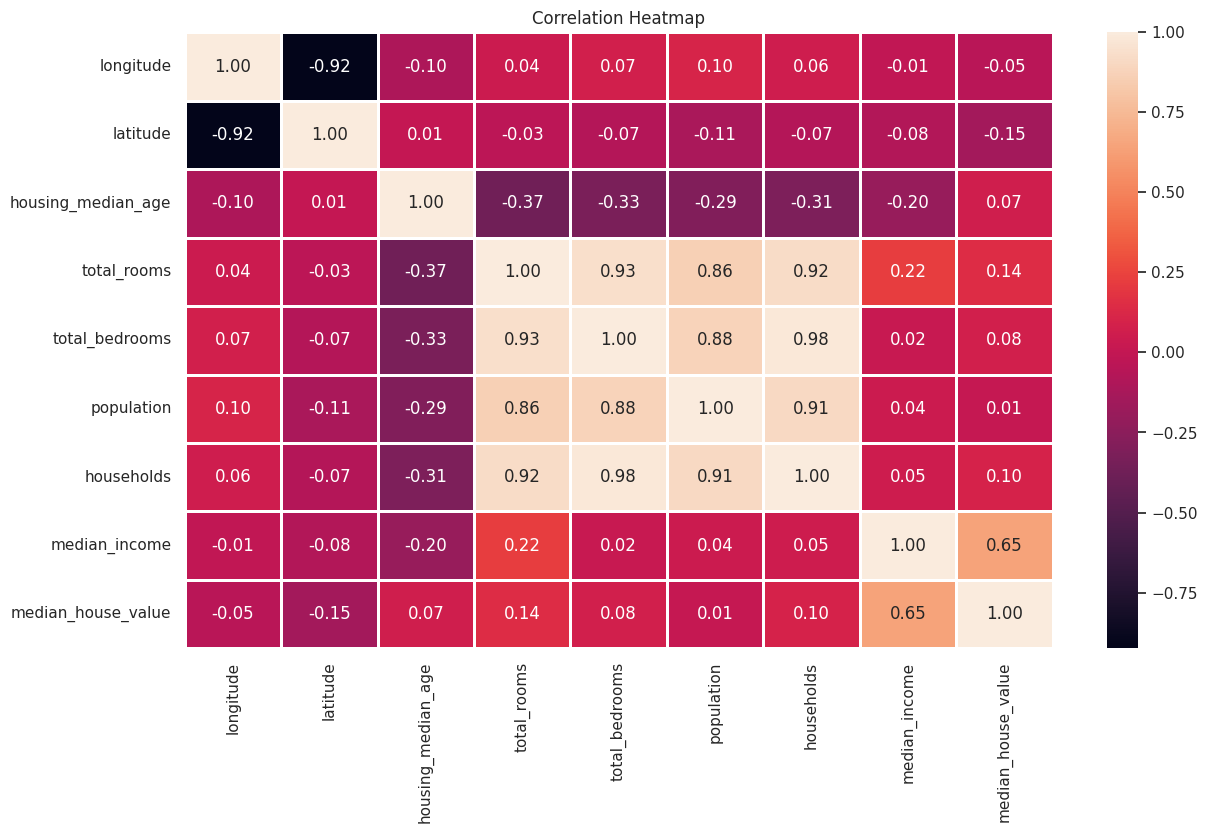

In [38]:
# Correlation heat map
sns.set(rc={'figure.figsize': (14, 8)})
sns.heatmap(housing.corr(numeric_only=True), annot = True, fmt = '.2f', linewidths = 2)
plt.title("Correlation Heatmap")
plt.show()

__Inputs__

>- From the correlation heatmap above, we can clearly see that there are a number of highly correlated varibles in our dataset; specifcally, `total_rooms`, `total_bedrooms`, `population`, and `households`. 
>- This seems somewhat unsurprising as the more houses there are, the more likely it is to have more people living there, more bedrooms, and more rooms in general. 
>- When we begin feature engineering, we may want to only keep one of these features to reduce multicolinearity or combine them into a new feature.

__Inputs and Output__

>- About the correlation between the features and the response, the most correlated one seems to be `median_income` not surprisingly. Whenever a person has more income, there is a tendency to buy a house with higher prices so that  (`median_income`, `median_house_value`) are positively correlated (0.65).
>- We may want to drop any feature that is not significantly correlated with our target varible. This may be for __model interpretability__, a simpler model is generally preferable and more easily interpretable, and to help escape the __curse of dimensionality__. Dropping features that are not significantly correlated with the target variable may improve your model accuracy if using a simple _linear_ model. However if you are using a **non-linear model**, that can combine features inside the learning model, then you may actually be losing valuable information as the variables may have a more complex relationship. In that instance other feature selection techniques will be more appropriate, such as **regularization** that we will learn about later.
>- Furthermore, there are limitations to looking too much into the correlation results. 
>- Correlation analysis can be affected by outliers, and the correlation p-value is going to be affected by the precision of the estimate (sample size). 
>- For example, the magnitude of effect may be small but the p-value can be "significant" if the sample size is large.

In [39]:
housing_na_rm = housing.dropna()

for i, feature in enumerate(housing):
    if not str(housing_na_rm[feature].dtypes) == "object":
        corr = pd.DataFrame(stats.pearsonr(housing_na_rm[feature], housing_na_rm["median_income"]), 
                            index = ["cor", "p-value"],
                            columns = [feature])
        if i ==0:
            all_corr = corr
        else:
            all_corr = pd.concat([all_corr, corr], axis = 1)
        
display(all_corr.round(3).sort_values(by="cor", axis=1))

housing_median_age  latitude  longitude  total_bedrooms  population  \
cor                  -0.195    -0.078     -0.009           0.022       0.043   
p-value               0.000     0.000      0.205           0.002       0.000   

         households  total_rooms  median_house_value  median_income  
cor           0.047        0.224               0.647            1.0  
p-value       0.000        0.000               0.000            0.0

>- Based on the calculated p-values, the correlation seems to be significant for almost all features ($<0.05$ threshold)

### 🚩 Exercise 6 (CORE)

Use `sns.pairplot` to further investigate the joint relationship between each pair of variables. What insights into the data might this provide over looking only at the correlation?

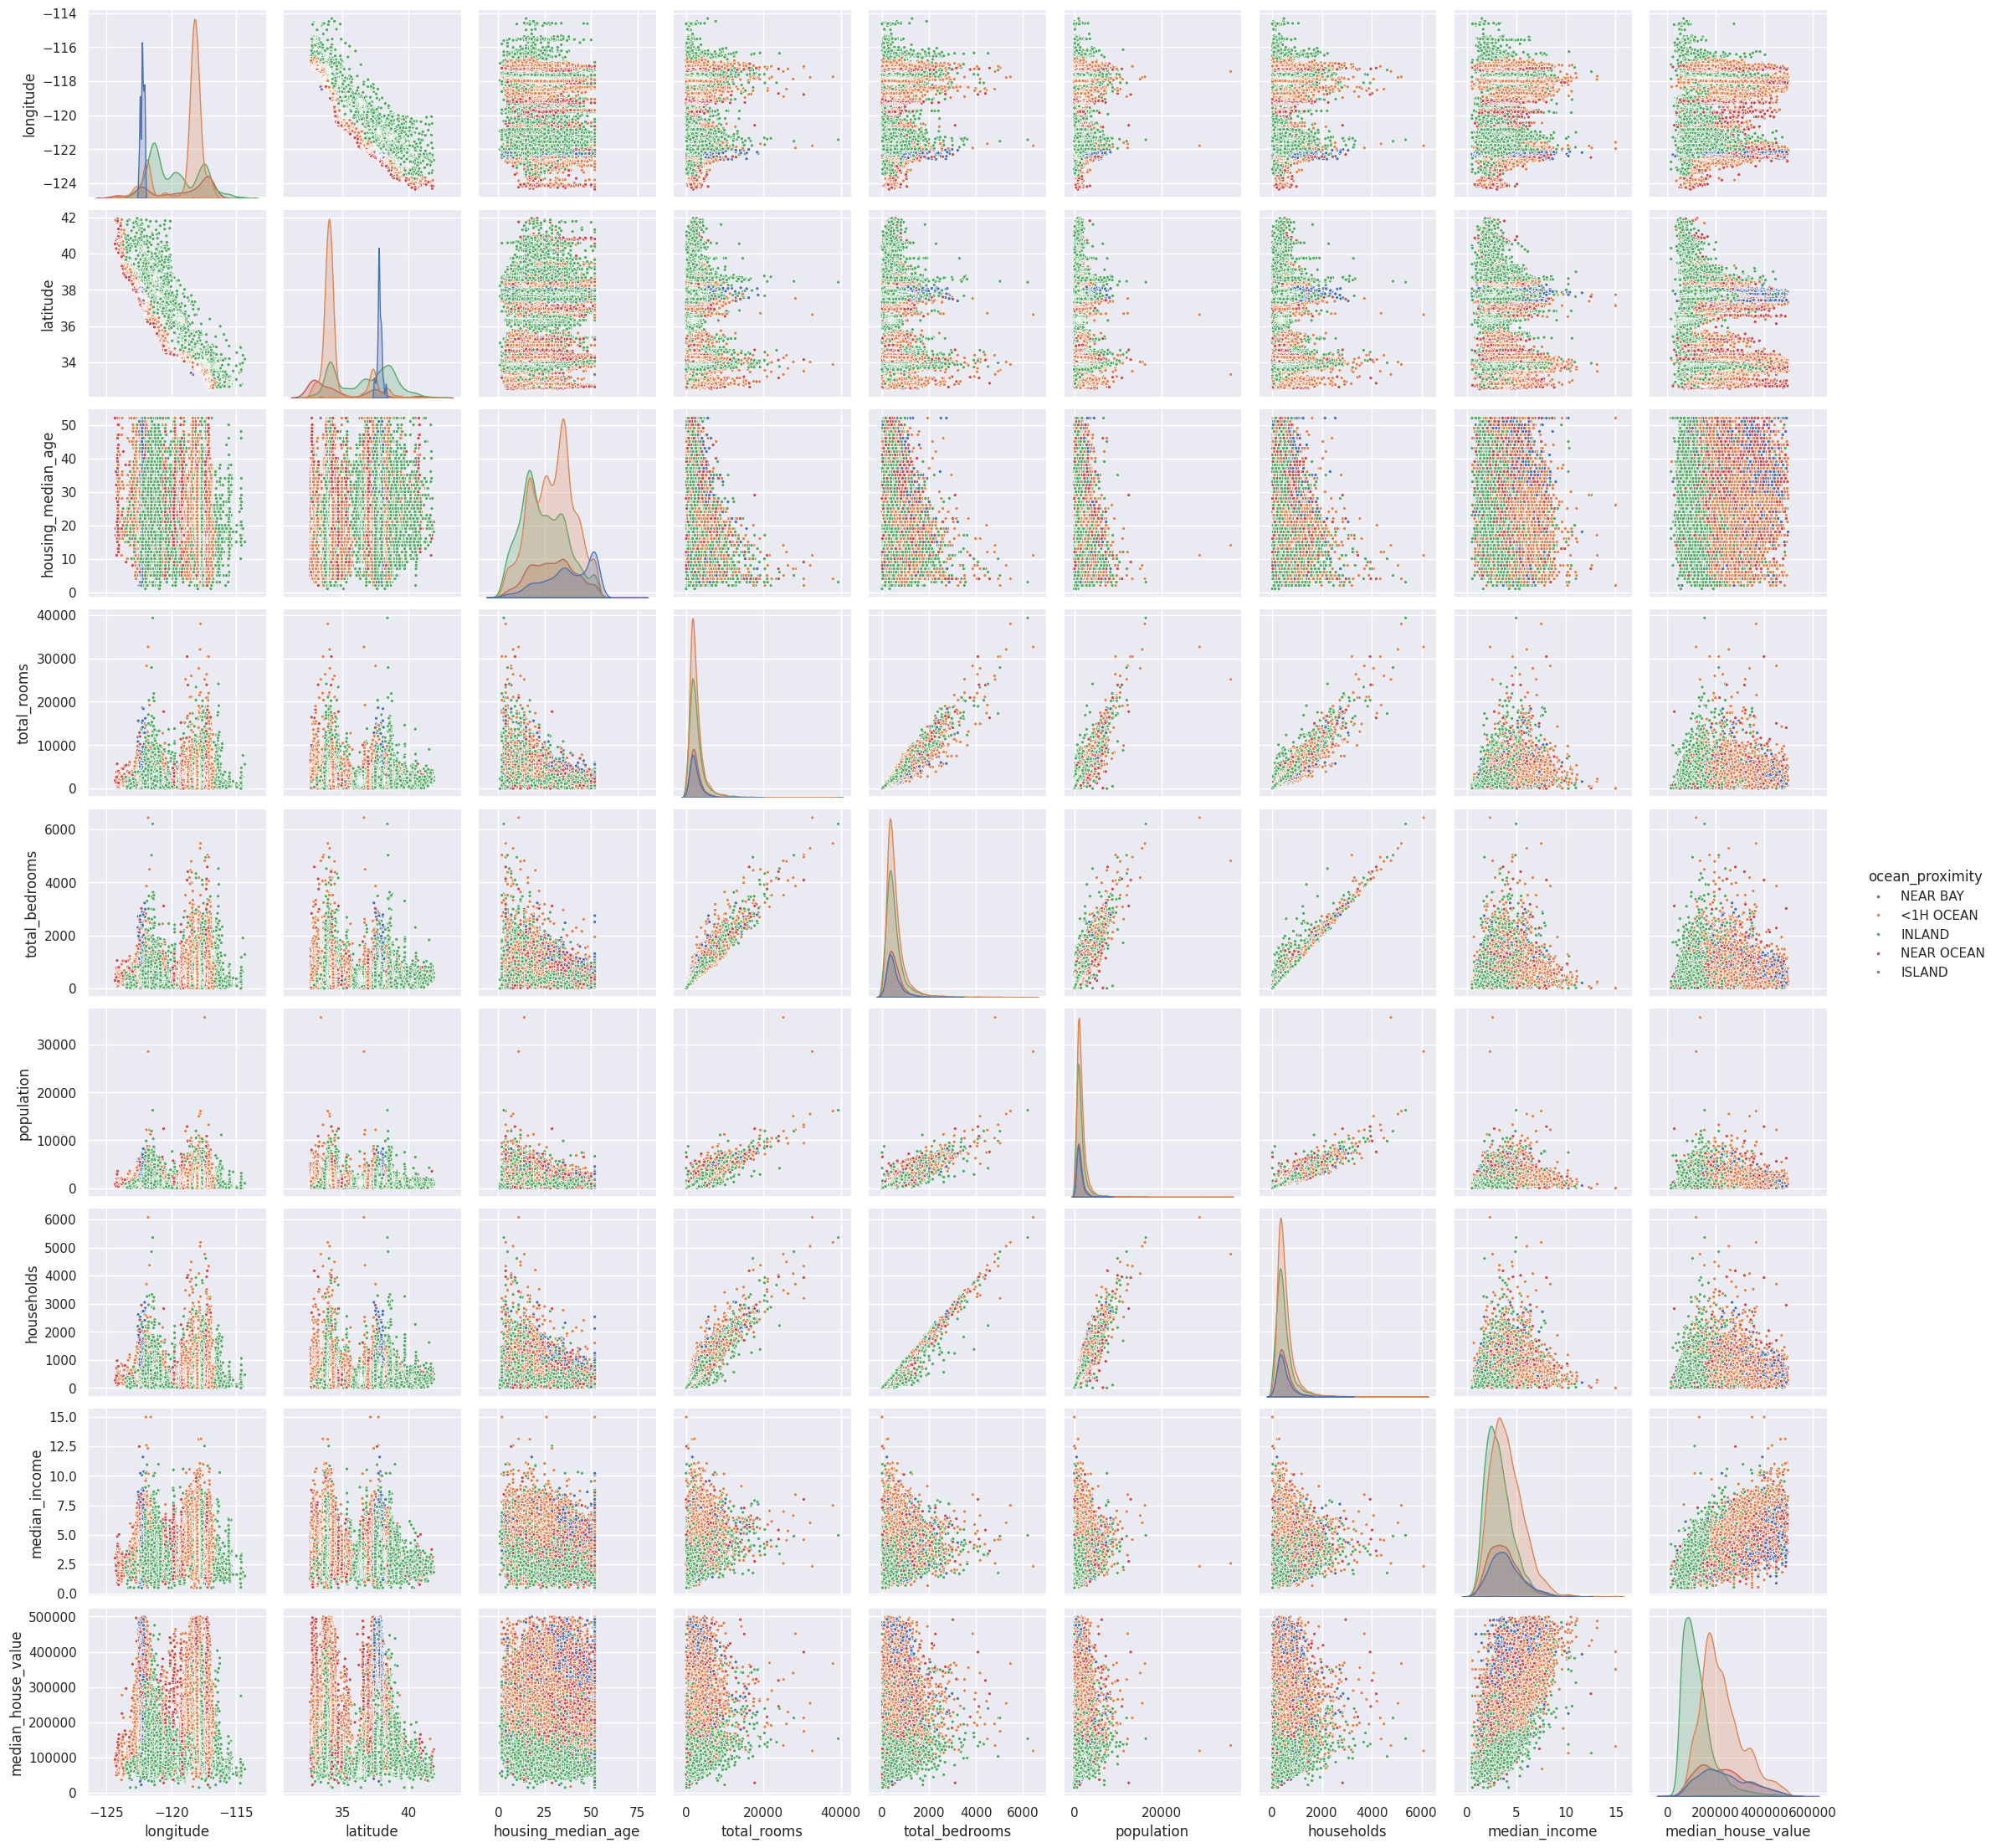

In [40]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.pairplot(housing.dropna(), hue="ocean_proximity", markers=".")
plt.show()

>- Correlation measures linear dependence. The pairs plot can help us to visualize if there may be nonlinear dependence.

# Data Pre-Processing <a id='prep'></a>

Now we have some familiarity with the data though EDA, lets start preparing our data to be modelled.



## Data Cleaning

Let's start with some basic data cleaning steps. For example, we may want to:
- deal with duplicated, inconsitencies or typos in the data, 
- handle missing data,
- remove uninformative features (e.g. subject identifiers), 
- fix variable types, 
- adjust data codes (e.g. missing variables may be coded as ‘999’ instead NA),
- optionally remove outliers. 

Let's start with the former.

### Data Duplication and Errors
We want to remove duplicates, that may have accidently been entered in the database twice, as they may bias our fitted model. In other words, we may potentially *overfit* to this subset of points. However, care should usually be taken to check they are not _real_ data with identical values.

There a number of ways we could identify duplicates, the simplist (and the approach we'll focus on) is just to find observations with the same feature values. Of course this will not identify things such as spelling errors, missing values, address changes, use of aliases, etc. This may commonly happen with categorical or text data, and checking the unique values is recommended. In general for such errors, more complicated methods along with manual assessment may be needed. 

### 🚩 Exercise 7 (CORE)

a) Are there any duplicated values in the data? If so how many?
<br>
<details><summary><b><u>Hint</b></u></summary>
With Pandas dataframes you can use `.duplicated()` to get a boolean of whether something is a duplicate and then use `.sum()` to count how many there are.
</details>


b) What are the unique values of the categorical variable? Are there any duplicated categories arising from misspellings?

In [41]:
print("There are {} duplicated observations".format(housing.duplicated().sum()))

There are 0 duplicated observations


In [42]:
housing['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

There are no misspellings in the categories of ocean proximity.

### Outlier Detection

An **Outlier** is a data point that lies abnormally far from other observations and may distort the model fit and results. In general, it is a good idea to examine if any outliers are present during preprocessing.  In some cases, you may want to drop these observations or cap their values (see https://feature-engine.trainindata.com/en/1.8.x/api_doc/outliers/index.html). However this may not be appropriate without explicit knowledge and testing if they are really outliers or not. In particular, when you drop or cap those observations you can discard important information unwittingly!

We will use basic statistics in order to try to identify outliers. A simple method of detecting outliers is to use the **inter-quartile range (IQR) proximity rule** (Tukey fences) which states that a value is an outlier if it falls outside these boundaries:

- Upper boundary = 75th quantile + (IQR * $k$) 

- Lower boundary = 25th quantile - (IQR * $k$)

where IQR = 75th quantile - 25th quantile (the length of the box in the boxplot). This is used to construct the whiskers in the boxplot, where $k$ is a nonnegative constant which is typically set to 1.5 (the default value in [`sns.boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)). However, it is also common practice to find extreme values by setting $k$ to 3.

### 🚩 Exercise 8 (EXTRA)

a) Can you identify any potential outliers using the generated boxplots below? Do you think any points should be removed?

b) Try changing $k$, defining the length of the whiskers, to 3 in `sns.boxplot`. Can you still identify any potential outliers?

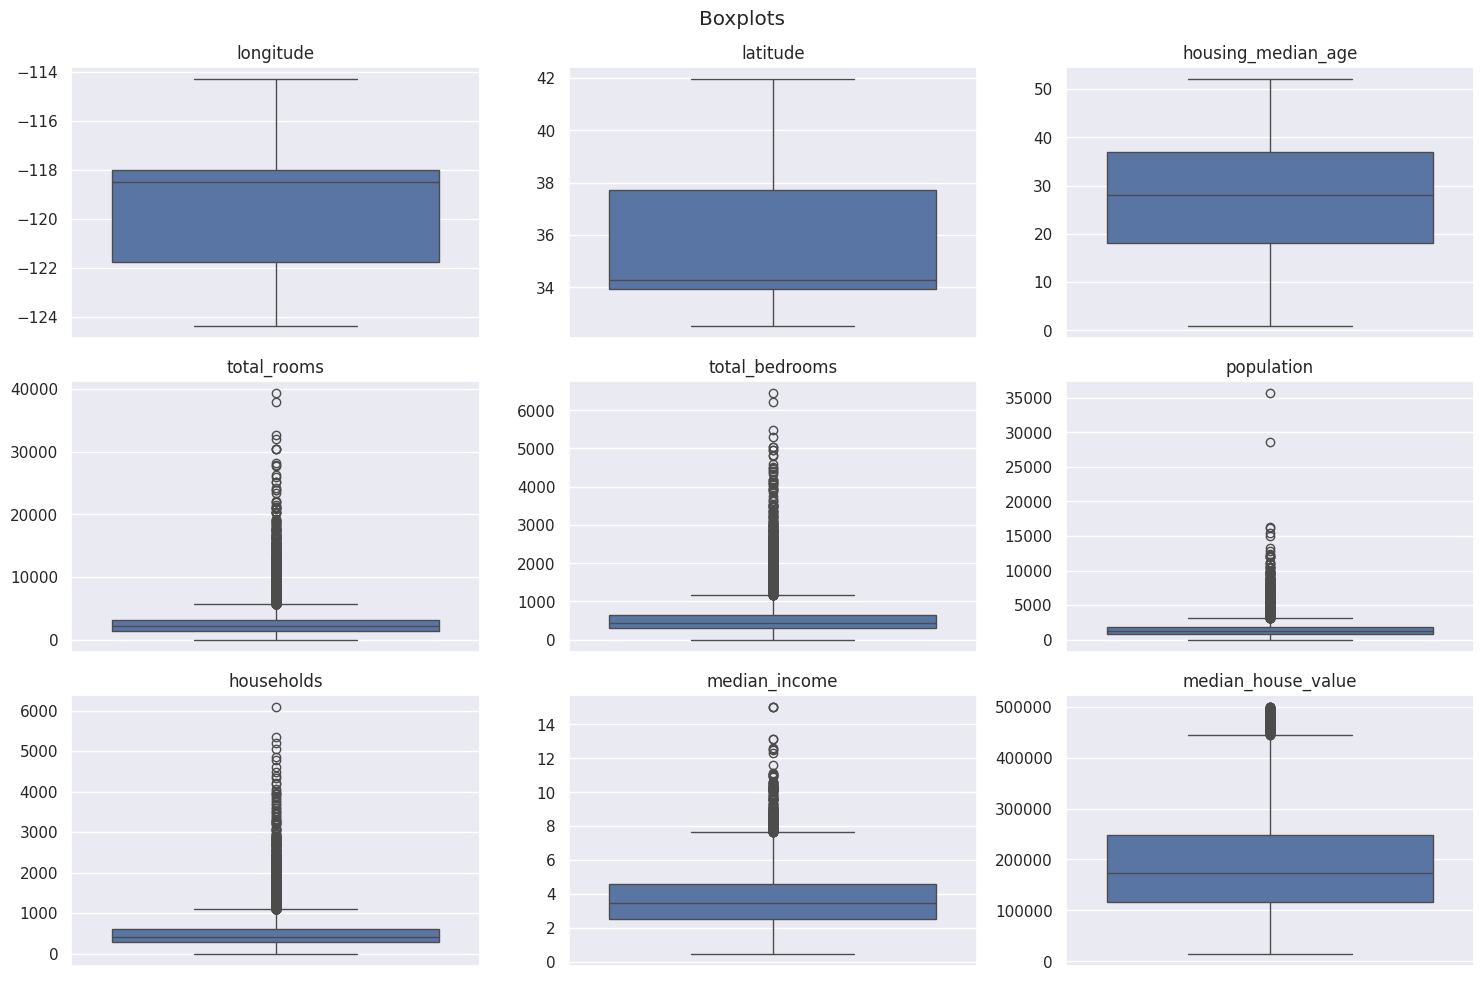

In [43]:
fig, axes = plt.subplots(figsize = (15,10), ncols = (housing.shape[1]-1)//3, nrows = 3, sharex = True)
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.boxplot(y = housing.iloc[:,i], ax = ax) 
    ax.set_title(housing.iloc[:,i].name)
    ax.set_ylabel("")
    
plt.suptitle("Boxplots")
plt.tight_layout()
plt.show()

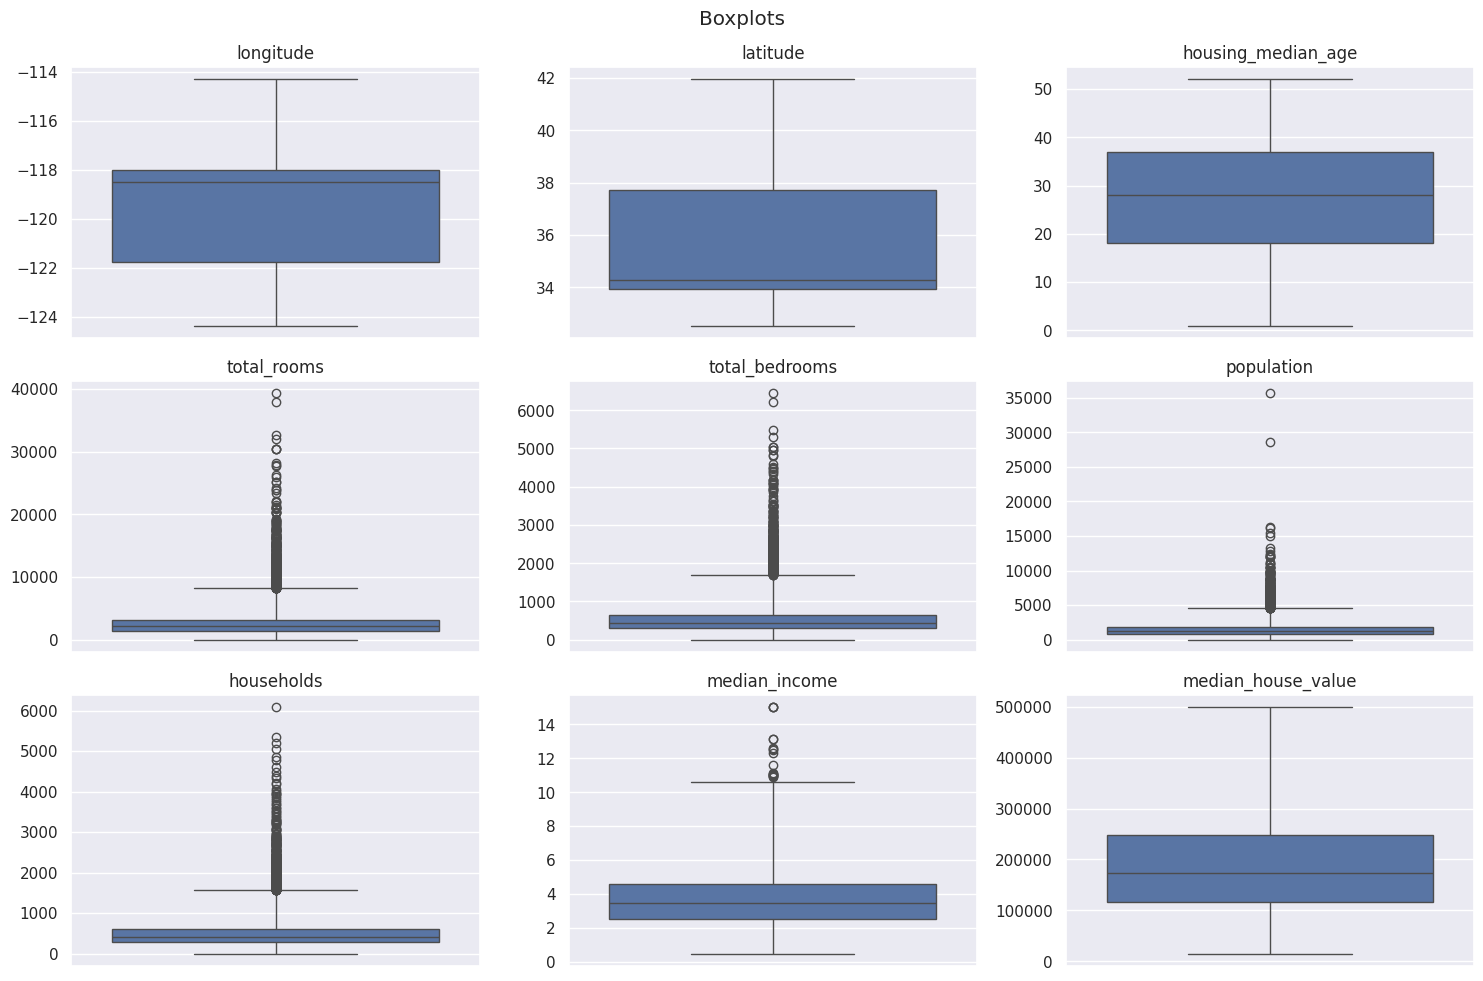

In [44]:
fig, axes = plt.subplots(figsize = (15,10), ncols = (housing.shape[1]-1)//3, nrows = 3, sharex = True)
axes = axes.flatten()

for i, ax in enumerate(axes):
    sns.boxplot(y = housing.iloc[:,i], whis = 3, ax = ax) 
    ax.set_title(housing.iloc[:,i].name)
    ax.set_ylabel("")
    
plt.suptitle("Boxplots")
plt.tight_layout()
plt.show()

>- From the boxplots above, we can see that a number of observations fall outside of the boundaries/whiskers. 
>- This case exists specifically for `total_rooms`, `total_bedrooms`, `population`, `households`, `median income`, and `median house value` in the above boxplots
>- At this point, we will not remove any outliers, as the ones identified from the boxplots are mostly related to the skewness of the count data. Instead, we will try different transformations.
>- Changing $k=3$, there are no longer outliers in median house value, but there are still many outliers in the count variables (total rooms, total bedrooms, population, households), and a handful for median income. 

🏁 **Now, is a good point to switch driver and navigator**

### Missing Data

Most ML models cannot handle missing values, and as we saw earlier, there are some present in `total_bedrooms`. We also saw that values of `median_house_value` are capped at $\$500,000$. This is another form of missingness, which is **informative** for missing values (i.e. the missing values are greater than $\$500,000$). However, we will focus on methods for dealing with missingness in our features and not the target variable. 

As such, let's start by splitting our **features** from our **target** variable in the data set.

In [45]:
# Extracting the features from the data
X = housing.drop("median_house_value", axis = 1)
features = list(X.columns)
print(features)
print(X.shape)
display(X.head())

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
(19648, 9)


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY

In [46]:
# Extracting the target features from the data
y = housing["median_house_value"].copy()
print(y.shape)
display(y.head())

(19648,)


0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


There are a number of ways we can deal with missing values. The simplest is to just **remove NA values**. 
We can do this in two ways by either:

1. Getting rid of the corresponding observations (deleting the corresponding rows).
2. Getting rid of the whole attribute (deleting the corresponding columns).

To is relatively straight forward by running `housing.dropna()` with either the `axis` set to `0` or `1` (depending if we want to remove rows or columns) before splitting our data into features (`X`) and outputs (`y`). 

### 🚩 Exercise 9  (CORE)

Use `dropna()` to remove the missing observations. What is the shape of the feature matrix after dropping the missing observations?

__Notes__

- It may be tempting to overwrite `X` while working on our pre-processing steps. __Don't do this!__ We will run these objects through our pipeline which combines missing data steps with other steps later, so if you want to test your function make sure to assign the output to tempory objects (e.g. `X_`).

In [47]:
housing_na_rm = housing.dropna()
X_ = housing_na_rm.drop("median_house_value", axis = 1)
y_ = housing_na_rm["median_house_value"]
print(X_.shape)
print(X.shape)

(19448, 9)
(19648, 9)


Instead of simply dropping missing data, we may instead want to use other **imputation** methods. From here on in, we will be creating functions for our data transformations. Later, we will see why this is really useful to define our **model pipeline**, which allows us to chain together transformations and steps in a reproducible way. 

In this course we are mostly going to be using `Scikit-learn`, with a little `Keras` at the end for neural networks. Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning (https://scikit-learn.org/stable/getting_started.html). It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities. 

We will first focus on the _transformer_ class within Scikit-learn, which provides functions for missing data imputation along with many others useful for data pre-processing and feature engineering.

#### **Transfomers**

If we want to __alter the features__ of our data, we need a _transfomer_.

- Transformers are classes that follow the scikit-learn API in Scikit-Learn [clean](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing), [impute](https://scikit-learn.org/1.5/modules/impute.html), [reduce](https://scikit-learn.org/stable/modules/unsupervised_reduction.html#data-reduction), [expand](https://scikit-learn.org/stable/modules/kernel_approximation.html#kernel-approximation), or [generate](https://scikit-learn.org/stable/modules/feature_extraction.html#feature-extraction) feature representations.

- Transformers are classes with a `.fit()` method, which learn model parameters (e.g. mean for mean imputation) from a training set, and a `.transform()` method which applies this transformation model to data. To create a custom transformer, all you need is to create a class that implements three methods: `fit()`, `transform()`, and `fit_transform()`.

Therefore to transform a dataset, each sampler implements:

```
obj.fit(data)
data_transformed = obj.transform(data)
```

or simply...

```
data_transformed = obj.fit_transform(data)`
```

See more details: https://scikit-learn.org/stable/data_transforms.html. In the following subsections, we will see examples of _transformers_ for categorical and numerical variables.

#### Data Imputation

Instead of removing the missing data we can set it to some value. To do this, Scikit-Learn provides various transformers, including:
- [`SimpleImputer`](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.SimpleImputer.html) which provides simple strategies (e.g. `"mean"`, `"median"` for numerical features and `"most_frequent"` for categorical features). 
- You can also add a missing indicator with the option `add_indicator=True` in `SimplerImputer`, or use the transfomer [`MissingIndicator`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html). This may be useful in the case when missing features may be provide information for predicting the target (e.g. obese patients may prefer not to report bmi, thus, this missingness could be useful for estimating the risk of health conditions or diseases). 
 - Beyond simple imputation strategies, sklearn also provides more advanced imputation strategies in [`IterativeImputer`](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer) and [`KNNImputer`](https://scikit-learn.org/1.5/modules/generated/sklearn.impute.KNNImputer.html)
 - Other strategies are also available in [`feature_engine.imputation`](https://feature-engine.trainindata.com/en/1.8.x/user_guide/imputation/index.html). Such as [`EndTailImputer`](https://feature-engine.trainindata.com/en/1.8.x/api_doc/imputation/EndTailImputer.html), which is useful when missing values are located in the tails (e.g. capped values for privacy)

Let's start with the `SimpleImputer` to learn about transfomers and how to deal with missing data in sklearn.

In [ ]:
from sklearn.impute import SimpleImputer

# First create the imputer object/transformer
num_imputer = SimpleImputer(strategy="median")

# Now fit the object to the data
# num_imputer.fit(X) -> Gives an error

Unfortunately, when we applied this to our data, we get the following error:

```
ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float:
```

This is because the "median" strategy can only be used with numerical attributes so we need a way of only applying imputation to certain attributes. We could temporarily remove the categorical feature from our data to apply our function, or apply the function to a subset of the data and assign the output to the same subset.

However scikit-learn has a handy function to specify what column we want to apply a function to!

In [ ]:
from sklearn.compose import ColumnTransformer

# Names of numerical columns
numcols = features[:-1]
print(numcols)
catcols = [features[-1]]
print(catcols)

num_cols_imputer = ColumnTransformer(
    # apply the `num_imputer` to all columns apart from the last
    [("num", num_imputer, numcols)],
    # don't touch all other columns, instead concatenate it on the end of the
    # changed data.
    remainder = "passthrough"
) 

num_cols_imputer.fit(X)

# Print the median values computed by calling fit
print("Computed median values for each numerical feature:")
print(num_cols_imputer["num"].statistics_)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
['ocean_proximity']
Computed median values for each numerical feature:
[-118.5       34.27      28.      2111.       436.      1179.
  411.         3.44905]


After using `.fit`, our object now has a number of attributes, including `statistics_` which stores the median value for each numerical attribute on the training set. This value can be used when validating and testing the model as it will be used if there is missing data in the new data.

__Note__
- The fitted `ColumnTransformer` contains a list of transformers, stored in the attribute `transformers_`. We named the first transformer in the list `num`. Try running `num_cols_imputer.transformers_` to see the names and types of the transformers in the list. 
- To access the fitted `num_imputer` in this case,  `num_cols_imputer["num"]` is a shortcut to access the named transformer in the list. 

Now, let's call `transform` to our fitted objected to impute the missing values.

In [ ]:
X_ = num_cols_imputer.transform(X)
print("Number of Missing Values")
pd.DataFrame(X_, columns = features).isna().sum()

Number of Missing Values


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

### 🚩 Exercise 10  (CORE)

In addition to median imputation, alter your transformer to also include a missing indicator. What is the shape of the transformed feature matrix? Use the method `.get_feature_names_out()` to print the names of the new features.

**Note:** You may want to add the option `verbose_feature_names_out = False` in your `ColumnTransformer` to reduce the length of the feature names.

In [ ]:
# Include a missing indicator for numerical features
num_imputer = SimpleImputer(strategy="median", add_indicator=True)

num_cols_imputer = ColumnTransformer(
    # apply the `num_imputer` to all columns apart from the last
    [("num", num_imputer, numcols)],
    # don't touch all other columns, instead concatenate it on the end of the
    # changed data.
    remainder = "passthrough",
    verbose_feature_names_out = False
) 

X_ = num_cols_imputer.fit_transform(X)
print(X_.shape)
X_ = pd.DataFrame(X_, columns = num_cols_imputer.get_feature_names_out())
display(X_.head())

(19648, 10)


longitude latitude housing_median_age total_rooms total_bedrooms population  \
0   -122.23    37.88               41.0       880.0          129.0      322.0   
1   -122.22    37.86               21.0      7099.0         1106.0     2401.0   
2   -122.24    37.85               52.0      1467.0          190.0      496.0   
3   -122.25    37.85               52.0      1274.0          235.0      558.0   
4   -122.25    37.85               52.0      1627.0          280.0      565.0   

  households median_income missingindicator_total_bedrooms ocean_proximity  
0      126.0        8.3252                             0.0        NEAR BAY  
1     1138.0        8.3014                             0.0        NEAR BAY  
2      177.0        7.2574                             0.0        NEAR BAY  
3      219.0        5.6431                             0.0        NEAR BAY  
4      259.0        3.8462                             0.0        NEAR BAY

🏁 **Now, is a good point to switch driver and navigator**

# Feature Engineering <a id='engin'></a>

As discussed in the lectures, feature engineering is where we extract features from data and transform them into formats that are suitable for machine learning models. Today, we will have a look at two main cases that are present in our data: **categorical** and **numerical** values.

Feature engineering also requires a _transformer_ class to __alter the features__.

## Categorical Variables

- In the dataset, we have an text attribute (`ocean_proximity`) that we already had to treat differently when cleaning and visualizing the data. This extends to feature engineering as well, where we need to use separate methods than those used with numerical variables.

- If we look at the unique values of this attribute, we will see that there are a limited number of possible values which represent a category. We need a way of encoding this information into our modeling framework **by converting our string/categorical variable into a numeric representation** that can be included in our models.

If we have a binary categorical variable (two levels) we could do this by picking one of the categorical levels and encode it as 1 and the other level as 0. 

However, in this case as we have multiple categories, we would probably want to use another encoding method. To illustrate, we can try encoding the the categorical feature `ocean_proximity` using both the `OrdinalEncoder` and `OneHotEncoder` available in `sklearn.preprocessing`.

__Side Notes__

- The output of the `OneHotEncoder` provided in Scikit-Learn is a SciPy _sparse matrix_, instead of a NumPy array. These are useful when you have lots of categories as your matrix becomes mostly full of 0's. To store all these 0's takes up unneccesary memory, so instead a sparse matrix just stores the location of nonzero elements. The good news is that you can use a sparse matrix similar to a numpy matrix, but if you wanted to, you can convert it to a dense numpy matrix using `.toarray()`.

- The above does not seem to be the case if passed through a `ColumnTransformer`.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Defining the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

encoder = ColumnTransformer(
    # apply the ordinal_encoder to the last column
    [("cat", ordinal_encoder, catcols)],
    remainder="passthrough",
    verbose_feature_names_out=False)

# fitting the encoder defined above
X_ = encoder.fit_transform(X) 

# Accessing the fitted ordinal encoder (encoder["cat"]) to see how the categories were mapped
display(dict(zip(list(encoder["cat"].categories_[0]), range(5))))

# Display the first few rows of the transformed data
display(pd.DataFrame(X_, columns = encoder.get_feature_names_out()).head())

{'<1H OCEAN': 0, 'INLAND': 1, 'ISLAND': 2, 'NEAR BAY': 3, 'NEAR OCEAN': 4}

ocean_proximity  longitude  latitude  housing_median_age  total_rooms  \
0              3.0    -122.23     37.88                41.0        880.0   
1              3.0    -122.22     37.86                21.0       7099.0   
2              3.0    -122.24     37.85                52.0       1467.0   
3              3.0    -122.25     37.85                52.0       1274.0   
4              3.0    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  
0           129.0       322.0       126.0         8.3252  
1          1106.0      2401.0      1138.0         8.3014  
2           190.0       496.0       177.0         7.2574  
3           235.0       558.0       219.0         5.6431  
4           280.0       565.0       259.0         3.8462

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Defining the OneHotEncoder
onehot_encoder = OneHotEncoder()

encoder = ColumnTransformer(
    # apply the onehot_encoder to the last column
    [("cat", onehot_encoder, catcols)],
    remainder="passthrough",
    verbose_feature_names_out=False) 

X_ = encoder.fit_transform(X) 

# Display the first few rows of the transformed data
display(pd.DataFrame(X_, columns = encoder.get_feature_names_out()).head())

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  longitude  latitude  \
0                       1.0                         0.0    -122.23     37.88   
1                       1.0                         0.0    -122.22     37.86   
2                       1.0                         0.0    -122.24     37.85   
3                       1.0                         0.0    -122.25     37.85   
4                       1.0                         0.0    -122.25     37.85   

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   
2                52.0       1467.0           190.0       496.0       177.0   
3                52.0       1274.0           235.0       558.0       219.0   
4                52.0       1627.0           280.0       565.0       259.0   

   median_income  
0         8.3252  
1         8.3014  
2         7.2574  
3         5.6431  
4         3.8462

### 🚩 Exercise 11 (CORE)

a) What is the main difference between two methods regarding the obtained features? Which encoding method do you think is most appropriate for this variable and why?

b) How sensible is the default ordering of the ordinal encoder? Use the parameter `categories` of `OrdinalEncoder` to apply a different ordering.

>- In the above encoding settings, `OrdinalEncoder` creates 5 different categories assuming that there is a natural order, whereas `OneHotEncoder` assigns a binary numerical variable for each category to create 5 different columns as new features instead of the original `ocean_proximity` column
>- The `OrdinalEncoder` assumes that two nearby integer values are more similar. If we had ordinal variables this would be fine (e.g. "bad", "average", "good"), but this is not the case here. Thus, an ordinal encoding is not appropriate. 
>- Here the `OneHotEncoder` is the appropriate option, as it assigns a binary attribute per category. For example the first attribute will have a 1 if the category for the observation is `'NEAR OCEAN` and 0 otherwise, the second 1 if the category is `NEAR BAY` and 0 otherwise, etc.
>- Note also that the default ordering of the categories in the `OrdinalEncoder` is alphabetical. A more sensible ordering might be: island, near ocean, near bay, <1hr from ocean, inland. We can change the ordering of the categories using the option `categories` in the code below. This is more parsimonious compared to the `OneHotEncoder` (which creates 4 additional features), however we may still prefer the `OneHotEncoder` as there is not such a natural ordering to some of the categories (e.g. near ocean and near bay). 

In [ ]:
# Define the list of ordered categories
ordered_categories = [["ISLAND", "NEAR OCEAN", "NEAR BAY","<1H OCEAN", "INLAND"]]
# Defining the OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=ordered_categories)

encoder = ColumnTransformer(
    # apply the ordinal_encoder to the last column
    [("cat", ordinal_encoder, catcols)],
    remainder="passthrough",
    verbose_feature_names_out=False)

# fitting the encoder defined above
X_ = encoder.fit_transform(X) 

# Accessing the fitted ordinal encoder (encoder["cat"]) to see how the categories were mapped
display(dict(zip(list(encoder["cat"].categories_[0]), range(5))))

# Display the first few rows of the transformed data
display(pd.DataFrame(X_, columns = encoder.get_feature_names_out()).head())

{'ISLAND': 0, 'NEAR OCEAN': 1, 'NEAR BAY': 2, '<1H OCEAN': 3, 'INLAND': 4}

ocean_proximity  longitude  latitude  housing_median_age  total_rooms  \
0              2.0    -122.23     37.88                41.0        880.0   
1              2.0    -122.22     37.86                21.0       7099.0   
2              2.0    -122.24     37.85                52.0       1467.0   
3              2.0    -122.25     37.85                52.0       1274.0   
4              2.0    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  
0           129.0       322.0       126.0         8.3252  
1          1106.0      2401.0      1138.0         8.3014  
2           190.0       496.0       177.0         7.2574  
3           235.0       558.0       219.0         5.6431  
4           280.0       565.0       259.0         3.8462

### 🚩 Exercise 12 (EXTRA)

Another handy feature of `OneHotEncoder` and `OrdinalEncoder` is that infrequent categories can be aggregated into a single feature/value. The parameters to enable the gathering of infrequent categories are `min_frequency` and `max_categories`.

Use the `max_categories` attribute to set the maximum number of categories to 4. Use the `get_feature_names_out()` method of `OneHotEncoder` to print the new category names. Which two features have been combined?


In [ ]:
onehot_encoder = OneHotEncoder(max_categories=4)

encoder = ColumnTransformer(
    # apply the onehot_encoder to the last column
    [("cat", onehot_encoder, catcols)],
    remainder="passthrough",
    verbose_feature_names_out=False)

X_ = encoder.fit_transform(X) 

print(encoder['cat'].get_feature_names_out(["ocean_proximity"]))

['ocean_proximity_<1H OCEAN' 'ocean_proximity_INLAND'
 'ocean_proximity_NEAR OCEAN' 'ocean_proximity_infrequent_sklearn']


The two categories with smallest frequencies, ISLAND and NEAR BAY, have been combined into a new category called `infrequent_sklearn`

### 🚩 Exercise 13 (EXTRA)

When there are many unordered categories, another useful encoding scheme is [`TargetEncoder`](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.TargetEncoder.html#sklearn.preprocessing.TargetEncoder) which uses the target mean conditioned on the categorical feature for encoding unordered categories. Whereas one-hot encoding would greatly inflate the feature space if there are a very large number of categories (e.g. zip code or region), `TargetEncoder` is more parsimonious. 

Use target encoding of ocean proximity. What are the numerical values assigned to the categories?

**Caution:** when using this transformer, be careful to avoid data leakage and overfitting by integrating it properly in your model pipeline! We will learn more about this later.

In [ ]:
# Create a target encoder
from sklearn.preprocessing import TargetEncoder
# Defining the TargetEncoder
target_encoder = TargetEncoder(target_type='continuous')

encoder = ColumnTransformer(
    # apply the target_encoder to the last column
    [("cat", target_encoder, catcols)],
    remainder="passthrough",
    verbose_feature_names_out=False)

X_ = encoder.fit_transform(X,y)
# Display the first few rows of the transformed data
display(pd.DataFrame(X_, columns = encoder.get_feature_names_out()).head())

ocean_proximity  longitude  latitude  housing_median_age  total_rooms  \
0    236672.509976    -122.23     37.88                41.0        880.0   
1    236672.509976    -122.22     37.86                21.0       7099.0   
2    234051.818901    -122.24     37.85                52.0       1467.0   
3    234051.818901    -122.25     37.85                52.0       1274.0   
4    236691.813075    -122.25     37.85                52.0       1627.0   

   total_bedrooms  population  households  median_income  
0           129.0       322.0       126.0         8.3252  
1          1106.0      2401.0      1138.0         8.3014  
2           190.0       496.0       177.0         7.2574  
3           235.0       558.0       219.0         5.6431  
4           280.0       565.0       259.0         3.8462

{'<1H OCEAN': 223721.2894544739, 'INLAND': 123199.69333189107, 'ISLAND': 361753.8907146532, 'NEAR BAY': 235894.5031165223, 'NEAR OCEAN': 226695.95125825997}


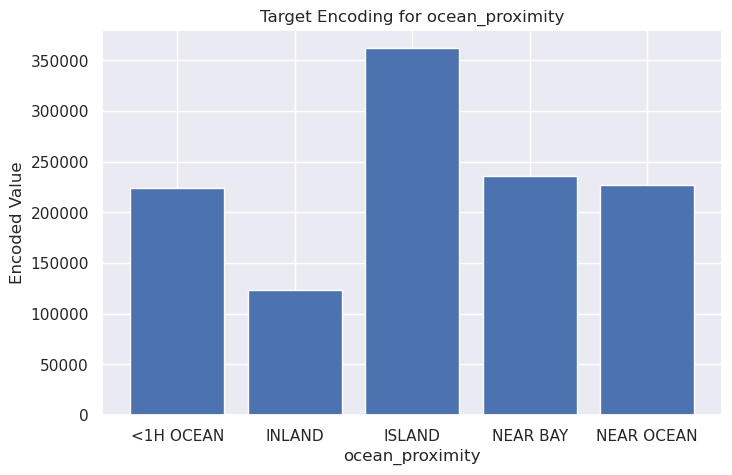

In [ ]:
# Print the learned target means for each category
print(dict(zip(list(encoder["cat"].categories_[0]), encoder["cat"].encodings_[0])))

# Plot the encodings against the categories
plt.figure(figsize=(8,5))
plt.bar(list(encoder["cat"].categories_[0]), encoder["cat"].encodings_[0])
plt.xlabel("ocean_proximity")
plt.ylabel("Encoded Value")
plt.title("Target Encoding for ocean_proximity")
plt.show()

## Numerical Variables

### Feature Scaling

As we will discuss in later weeks, many machine learning algorithms are sensitive to the scale and magnitude of the features, and especially differences in scales across features. For these algorithms, feature scaling will improve performance. 

For example, let's investigate the range of the features in our dataset:

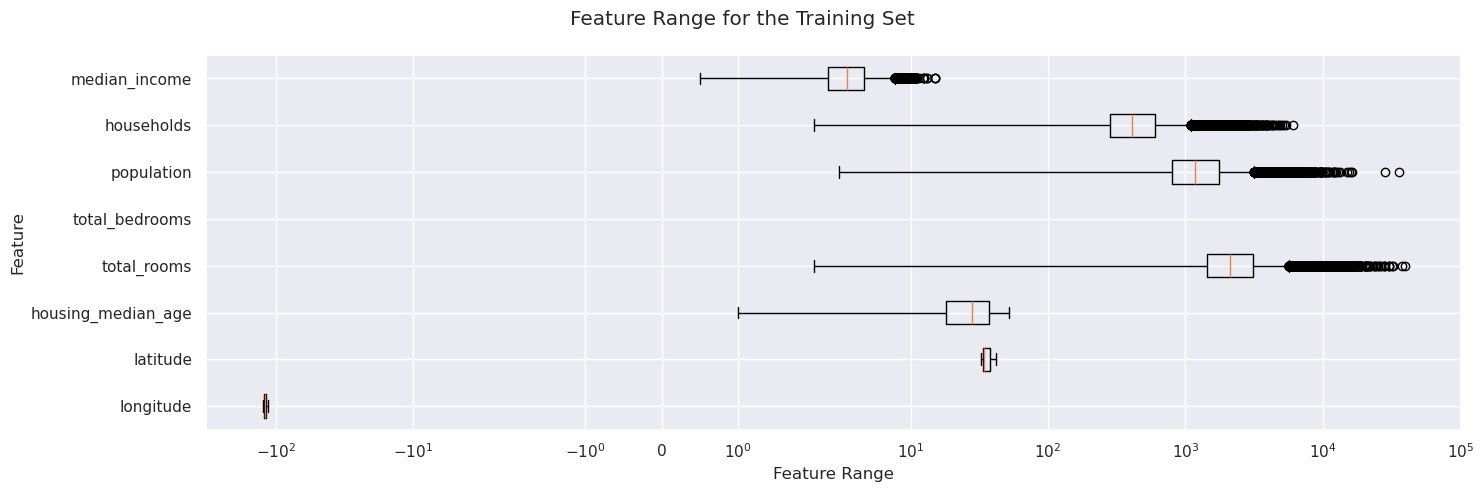

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))

plt.boxplot(X[numcols], vert = False) 
plt.xscale("symlog") 
plt.ylabel("Feature") 
plt.xlabel("Feature Range")

ax.set_yticklabels(numcols)

plt.suptitle("Feature Range for the Training Set")
plt.tight_layout()
plt.show()

There are various options in scikit learn for feature scaling, including: 

- Standardization (`preprocessing.StandardScaler`)

- Min-Max Scaling (`preprocessing.MinMaxScaler`)

- l2 Normalization (`preprocessing.normalize`)

- RobustScaler(`preprocessing.RobustScaler`)

- Scale with maximum absolute value (`preprocessing.MaxAbsScaler`)

>- As scaling generally improves the performance of most models when features cover a range of scales, it is probably a good idea to apply some sort of scaling to our data before fitting a model. 
>- *Standardization* (or *variance scaling*), is the most common, but there are a number of other types, as listed above.

### 🚩 Exercise 14 (CORE)

Try implementing at least two different scalers for the `total_rooms` and `total_bedrooms` variables. Make a scatter plot of the original and transformed features to see the main differences. 

Mean


array([2620.3376934 ,  539.64582476])

Std


array([2182.31640126,  422.54219328])

Min


array([-5.08672872e-05, -3.10414403e-04])

Scale


array([2.54336436e-05, 1.55207202e-04])

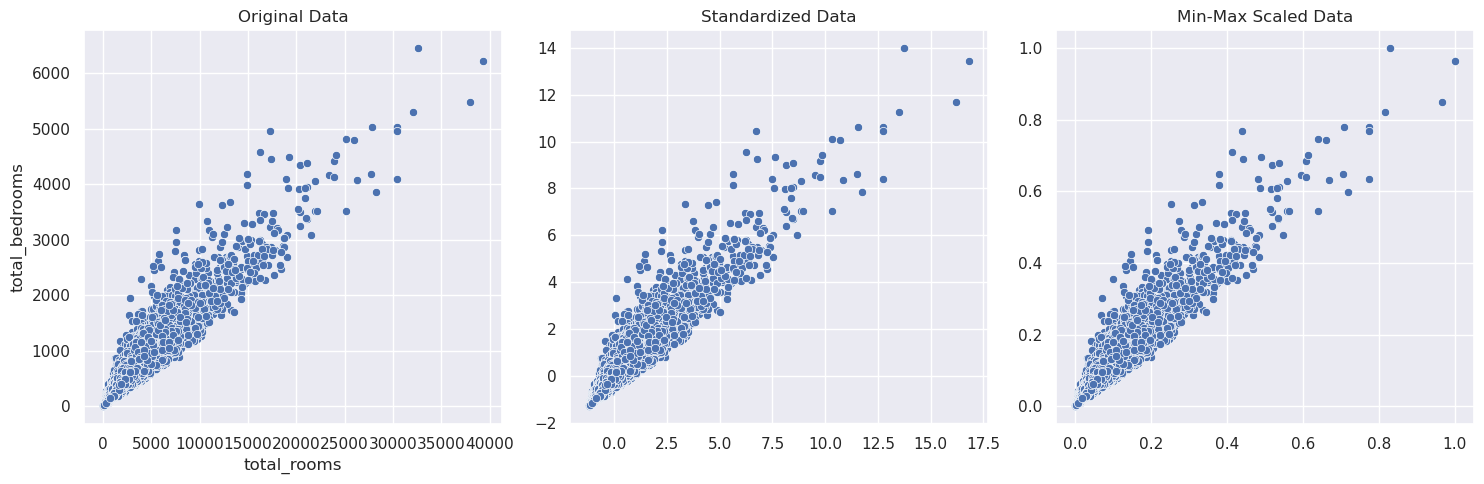

In [ ]:
# Standard Scaler 
# Standardize features to zero mean and unit variance.
from sklearn.preprocessing import StandardScaler
# MinMax Scaler 
# Rescales features to range between zero and one.
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
X_std = scaler.fit_transform(X[['total_rooms','total_bedrooms']])

# Mean and std values of original variables
print("Mean")
display(scaler.mean_)
print("Std")
display(scaler.scale_)

scaler = MinMaxScaler()
X_mm = scaler.fit_transform(X[['total_rooms','total_bedrooms']])

# Min and scale values of original variables
print("Min")
display(scaler.min_)
print("Scale")
display(scaler.scale_)

# Scatter plot to compare original vs standardized vs min-max scaled data
fig, axes = plt.subplots(figsize = (15,5), ncols = 3, nrows=1)
axes = axes.flatten()
sns.scatterplot(x = X['total_rooms'], y = X['total_bedrooms'], ax = axes[0])
axes[0].set_title("Original Data")
sns.scatterplot(x = X_std[:,0], y = X_std[:,1], ax = axes[1])
axes[1].set_title("Standardized Data")
sns.scatterplot(x = X_mm[:,0], y = X_mm[:,1], ax = axes[2])
axes[2].set_title("Min-Max Scaled Data")
plt.tight_layout()


### Power Transformation

In some cases, we may wish to apply transformations to our data, so that they have a more Gaussian distribution. For example, log transformations are useful for altering count data to have a more normal distribution as they pull in the more extreme high values relative to the median, while stretching back extreme low values away from the median. You can use a log transformation with either the pre-made `LogTransformer()` from `feature_engine.transformation`, or a custom function and `sklearn.preprocessing.FunctionTransformer`.

More generally, the natural logarithm, square root, and inverse transformations are special cases of the **Box-Cox** family of transformations (Box and Cox 1964). The question is **why do we need such a transformation and when?** 

- Note that, the method is typically used to transform the outcome, but can also be used to transform predictors. 

- The method assumes that the variable takes only positive values. If there are any zero or negative values, we can 1) shift the distribution towards positive values by adding a constant, or 2) use the **Yeo-Johnson transformation** (Yeo and Johnson 2000).

- In general, transormations can make interpretations more difficult, thus **you should think carefully if they are needed**, particularly if they only result in modest improvements in model performance. Moreover, finding a suitable transformation is typically a trial-and-error process.  

- Moreover, if you are transforming the features, you should also consider how this alters the relationship with the target variable. 

The Yeo-Johnson transformation is defined as:

$\tilde{y} = \left\{ \begin{array}{l l} \frac{(y+1)^{\lambda} - 1}{\lambda}, & \lambda \neq 0 \text{ and } y \geq 0  \\ \log (y +1), & \lambda = 0 \text{ and } y \geq 0 \\   -\frac{(1-y)^{2-\lambda} - 1}{2-\lambda}, & \lambda \neq 2 \text{ and } y < 0 \\ -\log (1-y), & \lambda = 2 \text{ and } y < 0\end{array} \right.,$

with the Box-Cox transformation as a special case (applied to $y-1$). 

Because the parameter of interest is in the exponent, this type of transformation is called a **power transformation** and is implemented in sklearn's [`PowerTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html). The parameter $\lambda$ is estimated from the data, and some values of $\lambda$ relate to common transformations, such as (for $y \geq 0$):

>* $\lambda = 1$ (no transformation)   
>* $\lambda = 0$ (log)   
>* $\lambda = 0.5$ (square root)   
>* $\lambda = -1$ (inverse)

- Using the code below, if `lmbda=None` then the function will "find the lambda that maximizes the log-likelihood function and return it as the second output argument"

- Notice that we can not use `lambda` directly since it conflicts with the available object called `lambda`, this is the reason we preferred the indicator name as `lmbda`



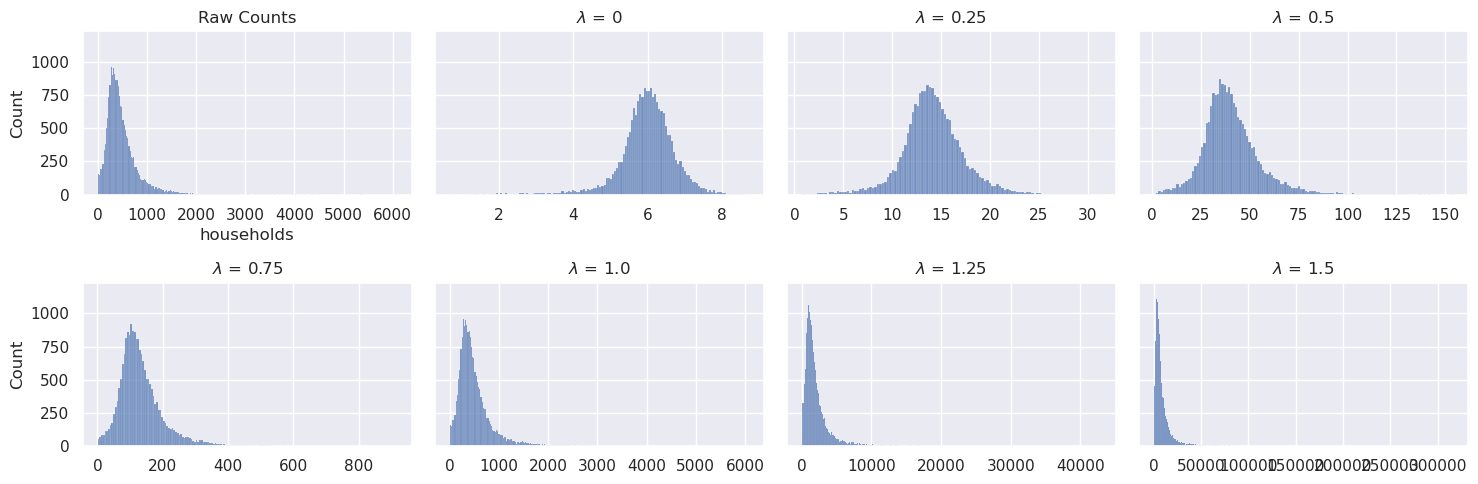

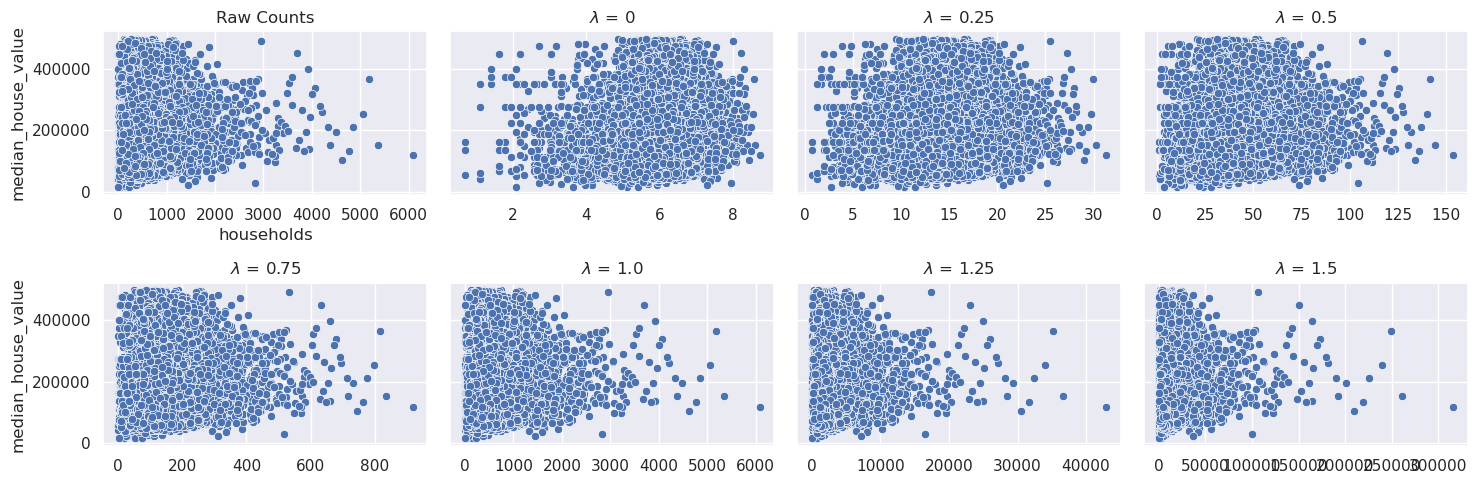

In [ ]:
fig, axes = plt.subplots(figsize = (15,5), ncols = 4, nrows=2, sharey = True)
axes = axes.flatten()
sns.histplot(data = X['households'], ax = axes[0])
axes[0].set_title("Raw Counts")

for i, lmbda in enumerate([0, 0.25, 0.5, 0.75, 1., 1.25, 1.5]):
    
    house_box_ = stats.boxcox(X['households'].astype(float), lmbda = lmbda)
    sns.histplot(data = house_box_, ax = axes[i + 1])
    axes[i + 1].set_title(r"$\lambda$ = {}".format(lmbda))
    
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(figsize = (15,5), ncols = 4, nrows=2, sharey = True)
axes = axes.flatten()
sns.scatterplot(x = X['households'], y = y, ax = axes[0])
axes[0].set_title("Raw Counts")

for i, lmbda in enumerate([0, 0.25, 0.5, 0.75, 1., 1.25, 1.5]):
    
    house_box_ = stats.boxcox(X['households'].astype(float), lmbda = lmbda)
    sns.scatterplot(x = house_box_, y = y, ax = axes[i + 1])
    axes[i + 1].set_title(r"$\lambda$ = {}".format(lmbda))
   
plt.tight_layout()
plt.show()

We can find the $\lambda$ that maximizes the log-likelihood function using scipy's `boxcox` function or sklearn's `PowerTransformer`.

In [ ]:
# Find the MLE for lambda (using scipy's boxcox function)
house_box_, bc_params = stats.boxcox(X['households'].astype(float), lmbda = None)
print(round(bc_params, 2))

# Find the MLE for lambda (using sklearn's PowerTransformer)
from sklearn.preprocessing import PowerTransformer
power_transformer = PowerTransformer(method='box-cox', standardize=False)
X_boxcox = power_transformer.fit_transform(X[['households']])
print(round(power_transformer.lambdas_[0], 2))

0.24
0.24


### 🚩 Exercise 15 (EXTRA)

- For the variable `households`, based on the `boxcox` transform shown above, do you think any of the values of $\lambda$ may be useful? 

- Apply a similar code snippet to `median_house_value`. Would any values of $\lambda$ be useful?

>- Looking at the plots above, a value of lambda between 0 (the log transform) and 0.25 may be useful. Indeed, finding a lambda that maximizes the log-likelihood function returns a value in this range.
>- If we look at relationship with the target variable, visually there may be a positively increasing relationship with possibly more stable variance in the errors. 

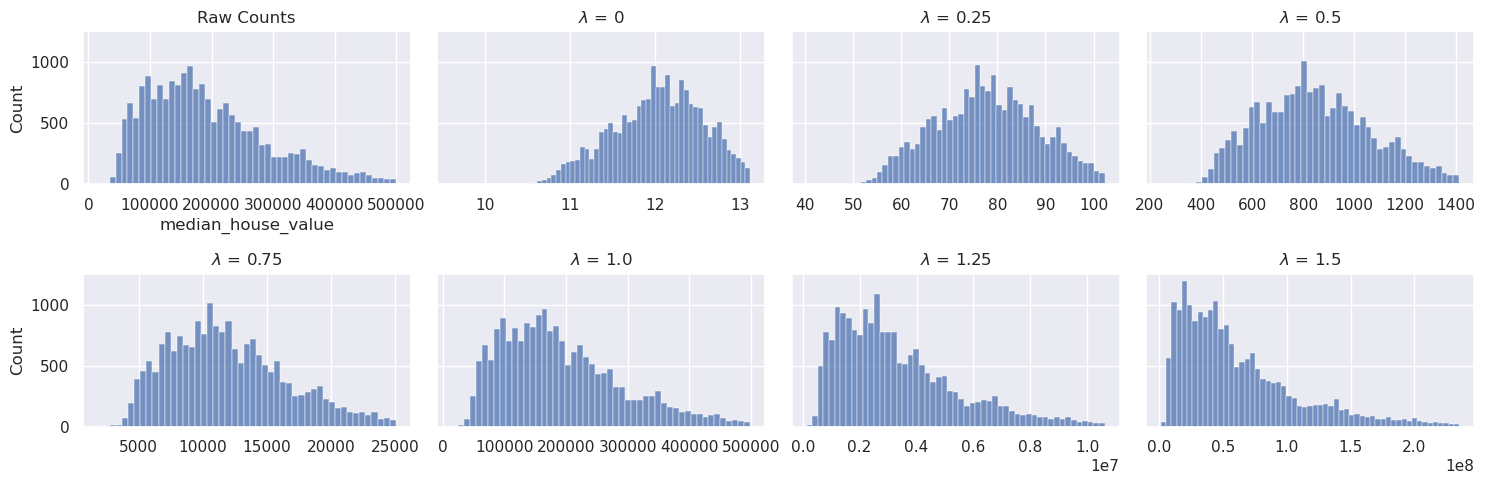

0.23

In [ ]:
# Repeat for median_house_value (y)
fig, axes = plt.subplots(figsize = (15,5), ncols = 4, nrows=2, sharey = True)
axes = axes.flatten()
sns.histplot(data = y, ax = axes[0])
axes[0].set_title("Raw Counts")

for i, lmbda in enumerate([0, 0.25, 0.5, 0.75, 1., 1.25, 1.5]):
    
    value_box_ = stats.boxcox(y.astype(float), lmbda = lmbda)
    sns.histplot(data = value_box_, ax = axes[i + 1])
    axes[i + 1].set_title(r"$\lambda$ = {}".format(lmbda))
    
plt.tight_layout()
plt.show()

value_box_, bc_params = stats.boxcox(y.astype(float), lmbda = None)
round(bc_params, 2)

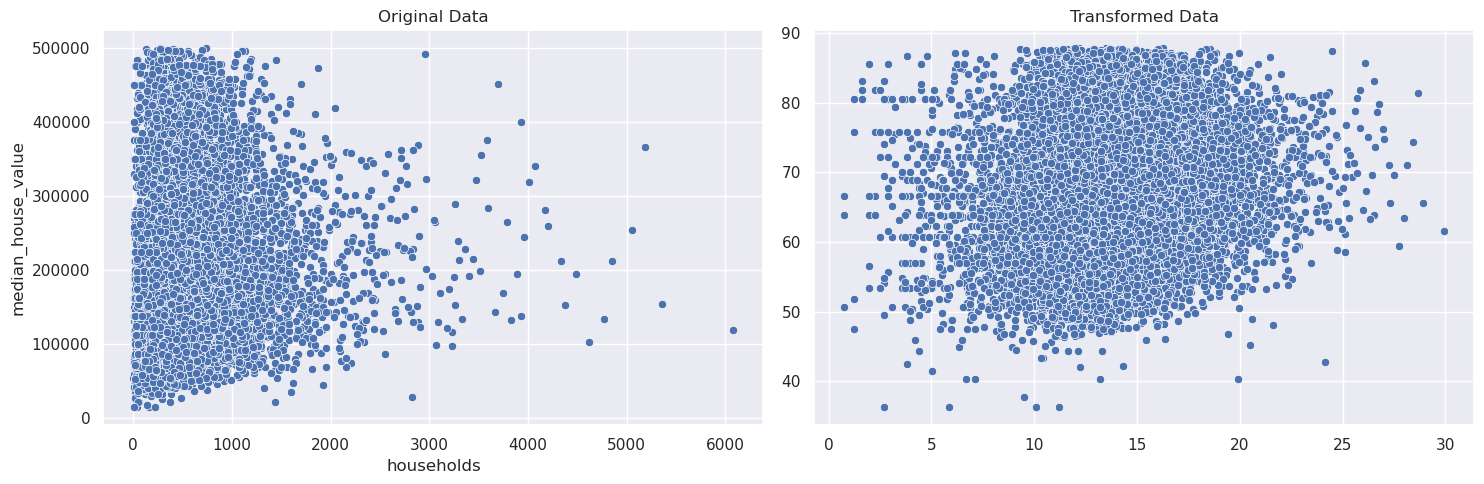

In [ ]:
# Compare a scatterplot of orginal vs transformed data
fig, axes = plt.subplots(figsize = (15,5), ncols = 2, nrows=1)
axes = axes.flatten()
sns.scatterplot(x = X['households'], y = y, ax = axes[0])
axes[0].set_title("Original Data")
sns.scatterplot(x = house_box_, y = value_box_, ax = axes[1])
axes[1].set_title("Transformed Data")
plt.tight_layout()
plt.show()

>- For the median house value, a value of lambda between 0 (the log transform) and 0.5 may be useful. Again, finding a lambda that maximizes the log-likelihood function returns a value in this range. 

## Feature Combinations

- Looking at the datas attributes we may also want to manually combine them into features that are either a more meaningful representation of the data or have better properties.

- For example, we know **the number of rooms** in a district, but this may be more useful to combine with the **number of households** so that we have **a measure of rooms per household**.

In [ ]:
rooms_per_household = X['total_rooms'] / X['households']
rooms_per_household.describe()

count    19648.000000
mean         5.361708
std          2.293321
min          0.846154
25%          4.416667
50%          5.185730
75%          5.971083
max        132.533333
dtype: float64


### 🚩 Exercise 16 (EXTRA)

- Can you think of other combinations that may be useful?

- Create a custom transformer that creates these new combinations of features using the `FunctionTransformer`.

<br />
<details><summary><b><u>Hint</b></u></summary>
What about the following?
   
- `population_per_household`
    
- `bedrooms_per_room`
    
</details>

In [ ]:
# Calculation for population_per_household
population_per_household = X['population'] / X['households']
population_per_household.describe()

count    19648.000000
mean         3.096560
std         10.639195
min          0.692308
25%          2.446614
50%          2.837779
75%          3.306021
max       1243.333333
dtype: float64

In [ ]:
# Calculation for bedrooms_per_room
bed_per_rooms = X['total_bedrooms'] / X['total_rooms']
bed_per_rooms.describe()

count    19448.000000
mean         0.214933
std          0.056922
min          0.100000
25%          0.177648
50%          0.204545
75%          0.240879
max          1.000000
dtype: float64

A more general function for this feature combination might be the following;

In [ ]:
def create_features(X,  add_rph=True, add_pph=True, add_bpr=True, drop_indiv=False):
    X_ = X.copy()
    
    if add_rph:
        X_['rooms_per_household'] = X_['total_rooms'] / X_['households']
    
    if add_pph:
        X_['population_per_household'] = X_['population'] / X_['households']
        
    if add_bpr:
        X_['bedrooms_per_room'] = X_['total_bedrooms'] / X_['total_rooms']
        
    if drop_indiv:
        X_ = X_.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1)

    return X_

new_features = create_features(X)
new_features.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  rooms_per_household  \
0       322.0       126.0         8.3252        NEAR BAY             6.984127   
1      2401.0      1138.0         8.3014        NEAR BAY             6.238137   
2       496.0       177.0         7.2574        NEAR BAY             8.288136   
3       558.0       219.0         5.6431        NEAR BAY             5.817352   
4       565.0       259.0         3.8462        NEAR BAY             6.281853   

   population_per_household  bedrooms_per_room  
0                  2.555556           0.146591  
1                  2.109842           0.155797  
2                  2.802260           0.129516  
3                  2.547945           0.184458  
4                  2.181467           0.172096

>- The above may be useful and meaningful, indeed some of these combinations are more correlated to the target than the features individually.
>- It is better to check the correlations and scatterplots between the new combinations and the target variable to get more information. 

For a custom Transformer, the following code snippet might be useful for further purposes. 

In [ ]:
from sklearn.preprocessing import FunctionTransformer

FeatureTransformer = FunctionTransformer(create_features)

X_ = FeatureTransformer.fit_transform(X)

# Showing it as data frame, we have new three combinations here after applying the FeatureTransformer
# The columns having index values are 0, 1 and 2 are new features
display(X.head())
display(X_.head())

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  rooms_per_household  \
0       322.0       126.0         8.3252        NEAR BAY             6.984127   
1      2401.0      1138.0         8.3014        NEAR BAY             6.238137   
2       496.0       177.0         7.2574        NEAR BAY             8.288136   
3       558.0       219.0         5.6431        NEAR BAY             5.817352   
4       565.0       259.0         3.8462        NEAR BAY             6.281853   

   population_per_household  bedrooms_per_room  
0                  2.555556           0.146591  
1                  2.109842           0.155797  
2                  2.802260           0.129516  
3                  2.547945           0.184458  
4                  2.181467           0.172096

## Other feature types

Feature engineering for other feature types beyond numerical categorical are also available in sklearn (e.g. for [text and images](https://scikit-learn.org/1.5/api/sklearn.feature_extraction.html)) and feature engine (e.g. for [Datetime](https://feature-engine.trainindata.com/en/1.8.x/user_guide/datetime/index.html) and for [time series](https://feature-engine.trainindata.com/en/1.8.x/user_guide/timeseries/index.html)). 

🏁 **Now, is a good point to switch driver and navigator**

## Combining into a Pipeline

Now, that we are familar with transformers, we are finally ready to create our first model pipeline! 

Pipelines are very useful when we want to run data through our pipeline in the future; rather than having to copy and paste a load of code, we can just use our pipeline which combines all the steps. Later on the course, we will see this is important when we split our data into training, validation, and test sets, but this would also be required if you deploy your model in a "live" environment. In particular, pipelines  help prevent you from **data leakage**, i.e. when information from your testing data leaks into your training or model selection. **Data leakage** is a common reason why many ML models fail to generalize to real world data. Furthermore, when refining a model, pipelines makes it easier for us to add or remove steps of our pipeline to see what works and what doesn't.

Its also worth examining what is meant by a **"Pipeline"**. A general definition is that it is just a sequence of data preparation operations that is ensured to be **reproducible**. Specifically, in sklearn,  `Pipeline` can contains a sequence of _transformer_ or _estimator_ classes, or, if we use an imbalanced-learn `Pipeline` instead, also _resamplers_. This week we have focused on _transformers_, but later on in the course we will learn about _estimators_ and _resamplers_. All three of these objects (_resamplers_, _transformers_, and _estimator_) all typically have a `.fit()` method. We have already seen examples of calling `.fit()` on _transformers_. The method works similarly on other classes and is used to
- validate and interpret any parameters, 
- validate the input data, 
- estimate and store attributes from the parameters and provided data, 
- return the fitted estimator to facilitate method chaining in a pipeline. 

Along with other sample properties (e.g. `sample_weight`), the `.fit()` method usually takes two inputs:

> - The input matrix (or design matrix) $\mathbf{X}$. The size of $\mathbf{X}$ is typically (n_samples, n_features), which means that samples are represented as rows and features are represented as columns.
>
> - The target values $\mathbf{y}$ which are real numbers for regression tasks, or integers for classification (or any other discrete set of values). For unsupervised learning tasks, $\mathbf{y}$ does not need to be specified. 
>
> https://scikit-learn.org/stable/getting_started.html

Other methods available for these objects other than `.fit()` will depend on what they are, e.g. `.transform()` for transformers, so we will learn about the methods for others objects later in the course. 

This week, our focus is combining different feature engineering steps together to make different model pipelines.

- Remember we want to create a pipeline that treats the **numerical** and **categorical** attributes differently. 
- We also need to supply the pipeline with an _estimator_ (i.e. model). For now, let's use a linear regression model, which we will learn in more details in week 4.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

numcols = features[:-1]
catcols = [features[-1]]

num_pre = Pipeline([
    ("num_impute", SimpleImputer(strategy="median")),
    ("num_scale", StandardScaler())])

cat_pre = Pipeline([
    ("cat_encode", OneHotEncoder(drop='first'))])

reg_pipe_1 = Pipeline([
    ("pre_processing", ColumnTransformer([("num_pre", num_pre, numcols),
                                          ("cat_pre", cat_pre, catcols)], 
                                          verbose_feature_names_out=False)),
    ("model", LinearRegression())
])

# Alternative and equivalent model avoiding nested pipelines
# reg_pipe_1 = Pipeline([
#     ("impute", ColumnTransformer([("num_imp", SimpleImputer(strategy="median"), numcols),
#                                           ("cat_imp", SimpleImputer(strategy="constant"), catcols)])),
#     ("transform", ColumnTransformer([("num_trns", StandardScaler(), numcols),
#                                           ("cat_trns", OneHotEncoder(drop='first'), catcols)])),                                     
#     ("model", LinearRegression())
# ])

display(reg_pipe_1)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('num_pre',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('num_scale',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat_pre',
                                                  Pipeline(steps=[('cat_encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['ocean_proximity'])],
                                   verbose_feature_names_out=False)),
                ('model', LinearRegression())])

In [ ]:
reg_pipe_1.fit(X,y)
# Print the R squared (ranges 0 to 1, with higher values better)
print(round(reg_pipe_1.score(X, y), 3))

0.616


In [ ]:
# Print the coeffcients
coef_df = pd.DataFrame({'coef': reg_pipe_1['model'].coef_}, 
             index = reg_pipe_1['pre_processing'].get_feature_names_out())
display(coef_df)

coef
longitude                   -47859.264413
latitude                    -47329.141480
housing_median_age           11229.695549
total_rooms                 -12148.402280
total_bedrooms               26572.524960
population                  -35666.279360
households                   26197.266409
median_income                59396.732974
ocean_proximity_INLAND      -39283.424562
ocean_proximity_ISLAND      169017.834460
ocean_proximity_NEAR BAY     -6753.898045
ocean_proximity_NEAR OCEAN    3862.519860

Let's try some other combinations of the pre-processing and feature engineering steps that we have learned about this week.

In [ ]:
# Reg Pipe 2 

# Define column indices
numcols = ['longitude', 'latitude', 'housing_median_age', 'median_income']
countcols = ['total_rooms', 'total_bedrooms', 'population', 'households']

# Reg Pipe 2 
num_pre = Pipeline([
    ("num_scale", StandardScaler())])

count_pre = Pipeline([
    ("count_impute", SimpleImputer(strategy="median")),
    ("count_transform", PowerTransformer(method='box-cox', standardize=True))])

cat_pre = Pipeline([
    ("cat_encode", OneHotEncoder(drop='first'))])

# Overall ML pipeline inlcuding all 
reg_pipe_2 = Pipeline([
    ("pre_processing", ColumnTransformer([
        ("num_pre", num_pre, numcols), 
        ("count_pre", count_pre, countcols),
        ("cat_pre", cat_pre, catcols)], verbose_feature_names_out=False)), 
    ("model", LinearRegression())
])


display(reg_pipe_2)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('num_pre',
                                                  Pipeline(steps=[('num_scale',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'median_income']),
                                                 ('count_pre',
                                                  Pipeline(steps=[('count_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('count_transform',
                                                                   PowerTransformer(method='box-cox'))]),
                                                  ['total_rooms',
                                                   'total_bedrooms',
                                                   'population',
                                                   'households']),
                                                 ('cat_pre',
                                                  Pipeline(steps=[('cat_encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['ocean_proximity'])],
                                   verbose_feature_names_out=False)),
                ('model', LinearRegression())])

In [ ]:
reg_pipe_2.fit(X,y)
# Print the R squared (ranges 0 to 1, with higher values better)
print(round(reg_pipe_2.score(X, y), 3))

0.638


In [ ]:
# Print the coeffcients
coef_df = pd.DataFrame({'coef': reg_pipe_2['model'].coef_}, 
             index = reg_pipe_2['pre_processing'].get_feature_names_out())
display(coef_df)

coef
longitude                   -50400.422929
latitude                    -51061.353637
housing_median_age           11255.808607
median_income                63164.098118
total_rooms                 -25257.948930
total_bedrooms               41975.966060
population                  -53007.816880
households                   40342.634318
ocean_proximity_INLAND      -35054.797879
ocean_proximity_ISLAND      150808.252780
ocean_proximity_NEAR BAY     -9772.706055
ocean_proximity_NEAR OCEAN    -457.043671

In [ ]:
# Reg Pipe 3
from feature_engine.transformation import LogTransformer
from sklearn.compose import TransformedTargetRegressor

numcols = ['longitude', 'latitude', 'housing_median_age']
skewcols = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

num_pre = Pipeline([
    ("num_scale", StandardScaler())])

skew_pre = Pipeline([
    ("skew_impute", SimpleImputer(strategy="median")),
    ("skew_transform", LogTransformer()),
    ("skew_scale", StandardScaler())])

cat_pre = Pipeline([
    ("cat_encode", OneHotEncoder(drop='first'))])

# Overall ML pipeline inlcuding all 
reg_pipe_3 = Pipeline([
    ("pre_processing", ColumnTransformer([
        ("num_pre", num_pre, numcols), 
        ("skew_pre", skew_pre, skewcols), 
        ("cat_pre", cat_pre, catcols)], verbose_feature_names_out=False)), 
    ("model", LinearRegression())
])
# Transform also the target variable
tt_reg_pipe_3 =TransformedTargetRegressor(regressor=reg_pipe_3,
                                  transformer=LogTransformer())

display(tt_reg_pipe_3)

TransformedTargetRegressor(regressor=Pipeline(steps=[('pre_processing',
                                                      ColumnTransformer(transformers=[('num_pre',
                                                                                       Pipeline(steps=[('num_scale',
                                                                                                        StandardScaler())]),
                                                                                       ['longitude',
                                                                                        'latitude',
                                                                                        'housing_median_age']),
                                                                                      ('skew_pre',
                                                                                       Pipeline(steps=[('skew_impute',
                                                                                                        SimpleImputer(strategy='median')),
                                                                                                       ('skew_transform',
                                                                                                        LogTransformer()),
                                                                                                       ('skew_scale',
                                                                                                        StandardScaler())]),
                                                                                       ['total_rooms',
                                                                                        'total_bedrooms',
                                                                                        'population',
                                                                                        'households',
                                                                                        'median_income']),
                                                                                      ('cat_pre',
                                                                                       Pipeline(steps=[('cat_encode',
                                                                                                        OneHotEncoder(drop='first'))]),
                                                                                       ['ocean_proximity'])],
                                                                        verbose_feature_names_out=False)),
                                                     ('model',
                                                      LinearRegression())]),
                           transformer=LogTransformer())

In [ ]:
tt_reg_pipe_3.fit(X,y)
# Print the R squared (ranges 0 to 1, with higher values better)
print(round(tt_reg_pipe_3.score(X, y), 3))

0.627


In [ ]:
# Print the coeffcients
# Note: get_feature_names_out() does not work for LogTransformer
reg3_features = np.concatenate([tt_reg_pipe_3.regressor_['pre_processing']['num_pre'].get_feature_names_out(),
               tt_reg_pipe_3.regressor_['pre_processing']['skew_pre'].feature_names_in_,
               tt_reg_pipe_3.regressor_['pre_processing']['cat_pre'].get_feature_names_out()]
)

coef_df = pd.DataFrame({'coef': tt_reg_pipe_3.regressor_['model'].coef_}, 
             index = reg3_features) 
display(coef_df)

coef
longitude                  -0.311725
latitude                   -0.328296
housing_median_age          0.025852
total_rooms                -0.091015
total_bedrooms              0.187593
population                 -0.264808
households                  0.179894
median_income               0.308365
ocean_proximity_INLAND     -0.285183
ocean_proximity_ISLAND      0.511323
ocean_proximity_NEAR BAY   -0.054118
ocean_proximity_NEAR OCEAN -0.051625

### 🚩 Exercise 17 (CORE)

Explain in words what are the differences in pre-processing and/or feature engineering steps used across the three model pipelines above. 

>- In all models, the categorical ocean proximity variable is treated the same and transformed using one hot encoding.
>- In the first model, all numerical variables are treated the same: median imputation for total bedrooms which has some missing values, followed by standarization for all.
>- In the second model, the count variables (total rooms, total bedrooms, population, and households) are treat differently. In particular, after imputation (if needed), we first apply a Box-Cox transformation, followed by standarization.
>- In the third model, all the skewed variables (that is all numerical variables except latitude, longitude and median age) are (after imputation if needed) log transformed and then standardized. 

### 🚩 Exercise 17 (EXTRA)

Try to create your own pipeline by modifying at least one of the pre-processing and feature engineering steps above. What have you decided to change and why?

# Summary <a id='sum'></a>

This week we covered a lot of ground!

- We've looked at some methods for pre-processing our data, cleaning and preparing it, as well as how to engineer some features and combine these steps into a reproducible pipeline.

- This is by **no means a complete collection of all the methods available** as covering more would go beyond the scope of this course (for those interested in learning more, have a look though the given companion readings). 

- For example, we did not touch on handling text and dates/time much. These topics are quite complex and have enough materials to cover their own courses.

# Competing the Worksheet

At this point you have hopefully been able to complete all the CORE exercises and attempted the EXTRA ones. Now 
is a good time to check the reproducibility of this document by restarting the notebook's
kernel and rerunning all cells in order.

Before generating the PDF, please **change 'Student 1' and 'Student 2' at the top of the notebook to include your name(s)**. 

Once that is done and you are happy with everything, you can then run the following cell 
to generate your PDF.

In [ ]:
# !jupyter nbconvert --to pdf mlp_week01_key.ipynb 

[NbConvertApp] Converting notebook mlp_week01_key.ipynb to pdf
[NbConvertApp] Support files will be in mlp_week01_key_files/
[NbConvertApp] Making directory ./mlp_week01_key_files
[NbConvertApp] Writing 188760 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 3913388 bytes to mlp_week01_key.pdf


Once generated, please submit this PDF on Learn page by 16:00 PM on the Friday of the week the workshop was given. Note that:

>- You don't need to finish everything, but you should have had a substantial attempt at the bulk of the material, particularly the CORE tasks. 
>- If you are having trouble generating the pdf, please ask a tutor or post on piazza. 
>- As a back option, if you are having errors in converting to pdf, then a quick solution is to export to html and then convert to pdf in your browser.